In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial import distance as dst
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


In [32]:
liked_columns = ['song_id', 'name', 'date_added', 'artist', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence', 'liveness', 'key', 'tempo', 'genres']

columns= ['song_id', 'name', 'artist', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence', 'liveness', 'key', 'tempo', 'genres']


In [33]:
#recent has same priority, match current music tastes, find new songs matching current taste
short_score = [x for x in range(70,20,-1)]
#medium term has lowest, in between is awkward I feel like, less important than long and short
medium_score = [x for x in range(50,0,-1)]
#long score highest priority, throwback jams that both like is great
long_score = [x for x in range(60,10,-1)]

# User 1 imported data from Spotify API

In [34]:
#top songs in short term
user1_short = [['3CblJq8QQQ0bb7vwJu8c3v', '4EVA (feat. Pharrell Williams)', ['KAYTRAMINÉ', 'Aminé', 'KAYTRANADA', 'Pharrell Williams'], 0.0248, 0.83, 0.695, 0.0755, -9.445, 0.0716, 0.536, 0.0573, 6, 112.046, ['alternative r&b', 'portland hip hop', 'rap', 'underground hip hop', 'pop rap', 'dance pop', 'lgbtq+ hip hop', 'escape room', 'pop', 'indie soul']], ['19mXqYcLHY716cN53T1d1E', 'Wish That You Were Mine', ['The Manhattans'], 0.555, 0.621, 0.534, 1.29e-05, -10.09, 0.036, 0.574, 0.297, 9, 119.615, ['classic soul', 'disco', 'funk', 'motown', 'philly soul', 'quiet storm', 'soul']], ['3Um9toULmYFGCpvaIPFw7l', "What's Going On", ['Marvin Gaye'], 0.447, 0.283, 0.716, 0, -9.632, 0.0986, 0.828, 0.399, 1, 201.96, ['classic soul', 'motown', 'neo soul', 'northern soul', 'quiet storm', 'soul']], ['1zZdEavQr1Vl769ZMqYUvk', 'Up All Night', ['Kenichiro Nishihara', 'SIRUP'], 0.322, 0.649, 0.8, 0.0147, -5.786, 0.0283, 0.561, 0.126, 4, 111.982, ['japanese soul', 'ambeat', 'japanese r&b']], ['0wOtc2nY3NOohp4xSwOyTN', 'We Might Even Be Falling In Love (Duet) - Spotify Singles', ['Victoria Monét', 'Bryson Tiller'], 0.473, 0.731, 0.423, 0.000413, -10.147, 0.0784, 0.78, 0.129, 6, 76.964, ['rap', 'alternative r&b', 'r&b', 'kentucky hip hop']], ['39sDitIeCMrVX2QyXHY46t', 'Blue Hair', ['TV Girl'], 0.554, 0.751, 0.72, 0.0497, -6.376, 0.0303, 0.884, 0.258, 4, 135.73, []], ['4OYXAD2OSy0RkSsQ0D9BEQ', 'Heartless', ['Kenichiro Nishihara', 'Michael Kaneko'], 0.599, 0.797, 0.79, 0.00271, -5.086, 0.0387, 0.824, 0.114, 5, 103.966, ['ambeat', 'japanese r&b']], ['1dHiSGzb9WFtDKnBFJs4KO', 'Just Say', ['Coco & Breezy', 'Tara Carosielli'], 0.0465, 0.83, 0.419, 0.0145, -9.76, 0.063, 0.511, 0.0815, 5, 119.993, ['soulful house', 'indie electropop']], ['4ZwgD4frTwoDdOUsjyoqAJ', 'Dancing In The Courthouse', ['Dominic Fike'], 0.187, 0.621, 0.741, 0, -4.479, 0.0611, 0.691, 0.227, 2, 76.464, ['alternative pop rock']], ['5cFREA8Fg75ytjbOC1NSOx', 'Pray', ['Kenichiro Nishihara', 'MARTER'], 0.0201, 0.616, 0.782, 0.0227, -6.301, 0.0318, 0.899, 0.0795, 0, 193.992, ['ambeat']], ['4UeWKazLR1ZwwSVnLw9Ir9', '踊り子', ['Vaundy'], 0.845, 0.718, 0.475, 0.801, -11.469, 0.0611, 0.678, 0.105, 7, 157.032, ['j-pop', 'japanese soul']], ['2i2gDpKKWjvnRTOZRhaPh2', 'Moonlight', ['Kali Uchis'], 0.511, 0.639, 0.723, 0, -6.462, 0.0532, 0.878, 0.167, 7, 136.872, ['colombian pop']], ['2aQpISWUBToaF84DDiTeRV', 'Be My Lover (feat. La Bouche) - 2023 Mix', ['Hypaton', 'David Guetta', 'La Bouche'], 0.0347, 0.589, 0.973, 0.000945, -5.317, 0.0426, 0.115, 0.45, 8, 126.003, ['pop dance', 'big room', 'eurodance', 'diva house', 'german techno', 'europop', 'edm', 'dance pop', 'pop']], ['59acp1OhcvxwVBwQJBYKuX', 'Loose', ['Daniel Caesar'], 0.926, 0.198, 0.162, 0.00896, -15.815, 0.0343, 0.0527, 0.135, 1, 70.453, ['canadian contemporary r&b']], ['2lnQcP5hr4RKR63TFvnI4k', 'Overjoyed', ['Stevie Wonder'], 0.541, 0.221, 0.264, 0, -17.533, 0.0332, 0.169, 0.148, 10, 83.128, ['motown', 'soul']], ['4qDpLaFGf5ampf2DXD2TMA', 'Where You Are', ['John Summit', 'Hayla'], 0.00953, 0.56, 0.832, 0.00541, -6.432, 0.0363, 0.0818, 0.546, 9, 126.0, ['house', 'uk dance']], ['6RANU8AS5ICU5PEHh8BYtH', "Isn't She Lovely", ['Stevie Wonder'], 0.182, 0.481, 0.826, 0.00352, -6.974, 0.0851, 0.819, 0.324, 1, 118.679, ['motown', 'soul']], ['0L26wNt3MUtn7BrTaHGtjj', 'Oasis', ['Crush', 'ZICO'], 0.222, 0.46, 0.81, 0, -4.158, 0.254, 0.836, 0.435, 4, 96.207, ['korean r&b', 'k-pop']], ['07gf6qIWA6yt58pR7uBDSw', 'Crave You - Hush Hush Bootleg', ['Flight Facilities', 'Giselle', 'Hush Hush'], 0.141, 0.83, 0.807, 0.00343, -6.899, 0.13, 0.163, 0.0591, 11, 120.012, ['australian indie', 'australian dance', 'nu disco', 'aussietronica', 'indietronica']], ['1qtwebmDBKPQEggSKGoSfy', 'Since I Have A Lover', ['6LACK'], 0.0231, 0.707, 0.73, 0.018, -4.152, 0.0317, 0.11, 0.286, 0, 120.022, ['atl hip hop', 'melodic rap', 'r&b', 'rap', 'trap']], ['3BbD2sqk7P7Rc9V0KF9o4s', 'My Humps', ['Joshwa', 'Lee Foss'], 0.0418, 0.862, 0.79, 0.00615, -8.412, 0.0672, 0.587, 0.0746, 4, 129.005, ['house', 'uk tech house', 'deep disco house']], ['1HA3u5rZF4yvaGNnNyKAMT', "Blowin' In The Wind", ['Stevie Wonder'], 0.361, 0.449, 0.434, 0, -8.486, 0.0356, 0.726, 0.262, 10, 104.674, ['motown', 'soul']], ['3lsiqFV6SKhBgzQCpuM1JR', 'Miracle (with Ellie Goulding) - Mau P Remix', ['Calvin Harris', 'Ellie Goulding', 'Mau P'], 0.00134, 0.642, 0.943, 0.085, -6.87, 0.0519, 0.44, 0.155, 8, 128.005, ['house', 'uk dance', 'indietronica', 'metropopolis', 'electro house', 'progressive house', 'uk pop', 'edm', 'dance pop', 'pop']], ['6iCJCZqDJjmBxt07Oid6FI', 'Buttercup', ['Hippo Campus'], 0.199, 0.623, 0.763, 6.52e-06, -4.412, 0.0719, 0.199, 0.126, 9, 108.871, ['indie pop', 'minneapolis indie', 'modern rock']], ['7E7YqRQZiASXIENrGYlpSU', 'DEUS DA GUERRA', ['$pidxrs?808', 'LEGIXN', 'FXRCE'], 0.0128, 0.646, 0.861, 0.104, -5.721, 0.0314, 0.373, 0.0767, 10, 135.993, ['phonk brasileiro']], ['3SdTKo2uVsxFblQjpScoHy', 'Stand by Me', ['Ben E. King'], 0.57, 0.65, 0.306, 7.07e-06, -9.443, 0.0393, 0.605, 0.0707, 9, 118.068, ['rock-and-roll', 'soul']], ['6Xom58OOXk2SoU711L2IXO', 'Moscow Mule', ['Bad Bunny'], 0.294, 0.804, 0.674, 1.18e-06, -5.453, 0.0333, 0.292, 0.115, 5, 99.968, ['reggaeton', 'trap latino', 'urbano latino']], ['7E6Uy2FLll3gaby9iyCfqz', 'Homiesexual (with Ty Dolla $ign)', ['Daniel Caesar', 'Ty Dolla $ign'], 0.102, 0.364, 0.48, 1.75e-06, -10.807, 0.0885, 0.32, 0.0979, 8, 198.32, ['canadian contemporary r&b', 'trap soul', 'hip hop', 'pop rap', 'trap', 'southern hip hop', 'r&b']], ['40SBS57su9xLiE1WqkXOVr', 'Afraid To Feel', ['LF SYSTEM'], 0.0166, 0.578, 0.912, 0.00362, -3.929, 0.114, 0.68, 0.273, 1, 127.87, ['uk dance']], ['0jHkgTtTaqg5LNCiYDQPUB', "Let's Get It On", ['Marvin Gaye'], 0.0392, 0.55, 0.611, 0, -10.657, 0.0443, 0.626, 0.0631, 3, 168.512, ['classic soul', 'motown', 'neo soul', 'northern soul', 'quiet storm', 'soul']], ['1jQfgl9WRle7D8a3GXLwaD', 'Transform (feat. Charlotte Day Wilson)', ['Daniel Caesar', 'Charlotte Day Wilson'], 0.511, 0.498, 0.292, 1.9e-05, -10.656, 0.031, 0.348, 0.256, 5, 68.963, ['canadian contemporary r&b', 'alternative r&b', 'indie soul']], ['6AQbmUe0Qwf5PZnt4HmTXv', "Boy's a liar Pt. 2", ['PinkPantheress', 'Ice Spice'], 0.252, 0.696, 0.809, 0.000128, -8.254, 0.05, 0.857, 0.248, 5, 132.962, ['bronx drill']], ['0dAfw35k2hBsnbSl74AVJF', 'dashstar*', ['Knock2'], 0.00872, 0.699, 0.949, 0.328, -2.994, 0.0739, 0.186, 0.151, 9, 126.07, []], ['5uakDGEx9HegMZZi840VzH', 'Evian (feat. PinkPantheress, Rizloski & Rax)', ['GoldLink', 'PinkPantheress', 'Rizloski', 'Rax'], 0.101, 0.824, 0.848, 0.0193, -7.051, 0.238, 0.968, 0.1, 8, 134.978, ['alternative r&b', 'dmv rap']], ['08M1S4uwtmPM0jIO1qNyhx', 'NOTHIN LIKE U (feat. Ty Dolla $ign)', ['KAYTRANADA', 'Ty Dolla $ign'], 0.0589, 0.787, 0.805, 1.61e-06, -6.294, 0.409, 0.769, 0.192, 9, 104.862, ['alternative r&b', 'trap soul', 'hip hop', 'pop rap', 'trap', 'southern hip hop', 'r&b', 'lgbtq+ hip hop', 'escape room', 'indie soul']], ['0Y71FEcRkyZOh4hySnEGB5', 'Baggage', ['Breakfast Santana', 'Khaji Beats'], 0.404, 0.629, 0.717, 3.33e-06, -8.505, 0.243, 0.655, 0.238, 0, 117.981, []], ['28JBD8p18xNuOfyV7Cotdn', 'Massive', ['Drake'], 0.114, 0.499, 0.671, 0.0169, -6.774, 0.0561, 0.0557, 0.148, 4, 124.994, ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']], ['2C0KFbb4v9CNWR5c9jWcKC', 'Andromeda (feat. DRAM)', ['Gorillaz', 'DRAM'], 0.003, 0.788, 0.472, 0.0322, -9.021, 0.0475, 0.257, 0.59, 0, 130.084, ['alternative hip hop', 'viral trap', 'rock', 'underground hip hop', 'virginia hip hop', 'trap', 'modern rock']], ['2ns1kl3c5NMvGCt2xVMNlI', 'Score (feat. SZA & 6LACK)', ['Isaiah Rashad', 'SZA', '6LACK'], 0.442, 0.5, 0.515, 0.00018, -8.283, 0.31, 0.566, 0.0681, 7, 85.173, ['rap', 'melodic rap', 'underground hip hop', 'hip hop', 'atl hip hop', 'trap', 'tennessee hip hop', 'r&b', 'pop']], ['3Dc86yXq3haXkQ5jwlxLiY', 'Shot My Baby', ['Daniel Caesar'], 0.00481, 0.483, 0.641, 0.0121, -6.945, 0.0412, 0.16, 0.223, 1, 84.96, ['canadian contemporary r&b']], ['47v4uUtj5AukJmCbMq4Kry', 'Freeze Tag (feat. Phoelix)', ['Terrace Martin', 'Robert Glasper', '9th Wonder', 'Kamasi Washington', 'Dinner Party', 'Phoelix'], 0.0596, 0.653, 0.598, 0, -6.928, 0.113, 0.137, 0.253, 11, 82.911, ['alternative hip hop', 'neo soul', 'jazz', 'alternative r&b', 'north carolina hip hop', 'afrofuturism', 'contemporary jazz', 'hip hop', 'jazz saxophone', 'neo r&b', 'indie hip hop', 'modern jazz piano', 'indie jazz', 'indie soul']], ['5aRZk9oWIYUB5alrTs8TTV', 'From Eden', ['Hozier'], 0.584, 0.399, 0.673, 2.44e-05, -5.506, 0.0509, 0.285, 0.118, 0, 142.255, ['irish singer-songwriter', 'modern rock', 'pop']], ['5de9Ho64dovuQI8Uhn5gPD', "I Don't Wanna Do This Anymore", ['XXXTENTACION'], 0.843, 0.433, 0.778, 0, -7.681, 0.041, 0.764, 0.139, 4, 114.208, ['emo rap', 'miami hip hop']], ['7y6c07pgjZvtHI9kuMVqk1', 'Get It Together', ['Drake', 'Black Coffee', 'Jorja Smith'], 0.0945, 0.781, 0.721, 0.391, -9.133, 0.0514, 0.849, 0.104, 5, 123.011, ['uk contemporary r&b', 'canadian pop', 'rap', 'toronto rap', 'hip hop', 'r&b', 'south african pop dance', 'south african house', 'canadian hip hop']], ['5UkoWcFsdWn8NtSAh73Vli', 'Temptation', ['SIDEPIECE'], 0.00665, 0.808, 0.878, 0.0152, -5.282, 0.0948, 0.624, 0.208, 9, 125.011, ['edm']], ['1c0hsvHLELX6y8qymnpLKL', 'Soltera - Remix', ['Lunay', 'Daddy Yankee', 'Bad Bunny'], 0.361, 0.795, 0.783, 0, -4.271, 0.0432, 0.799, 0.437, 5, 92.01, ['trap latino', 'reggaeton flow', 'latin hip hop', 'reggaeton', 'urbano latino']], ['38spM0LahLUfQhOMAqA7AI', 'Be Your Girl (Kaytranada Edition)', ['Teedra Moses', 'KAYTRANADA'], 0.208, 0.864, 0.682, 5.27e-06, -6.73, 0.386, 0.268, 0.1, 6, 115.012, ['neo soul', 'alternative r&b', 'lgbtq+ hip hop', 'escape room', 'indie soul']], ['39JofJHEtg8I4fSyo7Imft', 'B.O.T.A. (Baddest Of Them All) - Edit', ['Eliza Rose', 'Interplanetary Criminal'], 0.164, 0.736, 0.906, 0.585, -7.589, 0.048, 0.698, 0.106, 0, 137.001, ['house', 'breaks', 'experimental house']], ['4AwJSk491AvHk2AAJReGzZ', 'Let Me Go', ['Daniel Caesar'], 0.689, 0.601, 0.481, 0.0033, -8.366, 0.0634, 0.484, 0.109, 7, 152.994, ['canadian contemporary r&b']], ['4NczzeHBQPPDO0B9AAmB8d', 'Assumptions', ['Sam Gellaitry'], 0.123, 0.639, 0.815, 0.00113, -4.718, 0.221, 0.443, 0.193, 11, 126.055, ['future bass', 'scottish electronic', 'vapor twitch']]]
user1_short = pd.DataFrame(user1_short)
user1_short.columns = columns
user1_short["score"] = short_score

In [35]:
#top songs medium term
user1_medium = [['0wOtc2nY3NOohp4xSwOyTN', 'We Might Even Be Falling In Love (Duet) - Spotify Singles', ['Victoria Monét', 'Bryson Tiller'], 0.473, 0.731, 0.423, 0.000413, -10.147, 0.0784, 0.78, 0.129, 6, 76.964, ['rap', 'alternative r&b', 'r&b', 'kentucky hip hop']], ['0Yz3F0UGDibDe8uU69zmjn', 'And July', ['HEIZE', 'DEAN', 'dj friz'], 0.0401, 0.734, 0.852, 0, -3.85, 0.0916, 0.787, 0.196, 2, 98.504, ['korean pop', 'korean r&b', 'k-pop']], ['65FftemJ1DbbZ45DUfHJXE', 'OMG', ['NewJeans'], 0.357, 0.804, 0.771, 3.07e-06, -4.067, 0.0433, 0.739, 0.108, 9, 126.956, ['k-pop', 'k-pop girl group']], ['5uakDGEx9HegMZZi840VzH', 'Evian (feat. PinkPantheress, Rizloski & Rax)', ['GoldLink', 'PinkPantheress', 'Rizloski', 'Rax'], 0.101, 0.824, 0.848, 0.0193, -7.051, 0.238, 0.968, 0.1, 8, 134.978, ['alternative r&b', 'dmv rap']], ['3CblJq8QQQ0bb7vwJu8c3v', '4EVA (feat. Pharrell Williams)', ['KAYTRAMINÉ', 'Aminé', 'KAYTRANADA', 'Pharrell Williams'], 0.0248, 0.83, 0.695, 0.0755, -9.445, 0.0716, 0.536, 0.0573, 6, 112.046, ['alternative r&b', 'portland hip hop', 'rap', 'underground hip hop', 'pop rap', 'dance pop', 'lgbtq+ hip hop', 'escape room', 'pop', 'indie soul']], ['39JofJHEtg8I4fSyo7Imft', 'B.O.T.A. (Baddest Of Them All) - Edit', ['Eliza Rose', 'Interplanetary Criminal'], 0.164, 0.736, 0.906, 0.585, -7.589, 0.048, 0.698, 0.106, 0, 137.001, ['house', 'breaks', 'experimental house']], ['4Tla2jt77nO70DgGwFejbK', 'Run It Up', ['Snakehips', 'EARTHGANG'], 0.00621, 0.838, 0.793, 0, -5.176, 0.145, 0.527, 0.0962, 2, 120.062, ['uk dance', 'tropical house', 'rap', 'underground hip hop', 'hip hop', 'electropop', 'atl hip hop', 'psychedelic hip hop']], ['40SBS57su9xLiE1WqkXOVr', 'Afraid To Feel', ['LF SYSTEM'], 0.0166, 0.578, 0.912, 0.00362, -3.929, 0.114, 0.68, 0.273, 1, 127.87, ['uk dance']], ['4AwJSk491AvHk2AAJReGzZ', 'Let Me Go', ['Daniel Caesar'], 0.689, 0.601, 0.481, 0.0033, -8.366, 0.0634, 0.484, 0.109, 7, 152.994, ['canadian contemporary r&b']], ['08M1S4uwtmPM0jIO1qNyhx', 'NOTHIN LIKE U (feat. Ty Dolla $ign)', ['KAYTRANADA', 'Ty Dolla $ign'], 0.0589, 0.787, 0.805, 1.61e-06, -6.294, 0.409, 0.769, 0.192, 9, 104.862, ['alternative r&b', 'trap soul', 'hip hop', 'pop rap', 'trap', 'southern hip hop', 'r&b', 'lgbtq+ hip hop', 'escape room', 'indie soul']], ['4qDpLaFGf5ampf2DXD2TMA', 'Where You Are', ['John Summit', 'Hayla'], 0.00953, 0.56, 0.832, 0.00541, -6.432, 0.0363, 0.0818, 0.546, 9, 126.0, ['house', 'uk dance']], ['6AQbmUe0Qwf5PZnt4HmTXv', "Boy's a liar Pt. 2", ['PinkPantheress', 'Ice Spice'], 0.252, 0.696, 0.809, 0.000128, -8.254, 0.05, 0.857, 0.248, 5, 132.962, ['bronx drill']], ['0aR99yr1CNoxlZxm2veB65', 'At All', ['KAYTRANADA'], 0.0399, 0.898, 0.471, 0.698, -10.13, 0.519, 0.41, 0.0694, 2, 120.099, ['alternative r&b', 'escape room', 'indie soul', 'lgbtq+ hip hop']], ['1ZGyyYFVOIIZtzsoC1A2mX', 'TIL I DIE', ['Space Rangers', 'Disco Lines'], 0.00045, 0.806, 0.931, 0.303, -3.35, 0.0579, 0.829, 0.0893, 11, 123.985, []], ['1dHiSGzb9WFtDKnBFJs4KO', 'Just Say', ['Coco & Breezy', 'Tara Carosielli'], 0.0465, 0.83, 0.419, 0.0145, -9.76, 0.063, 0.511, 0.0815, 5, 119.993, ['soulful house', 'indie electropop']], ['4UeWKazLR1ZwwSVnLw9Ir9', '踊り子', ['Vaundy'], 0.845, 0.718, 0.475, 0.801, -11.469, 0.0611, 0.678, 0.105, 7, 157.032, ['j-pop', 'japanese soul']], ['0dAfw35k2hBsnbSl74AVJF', 'dashstar*', ['Knock2'], 0.00872, 0.699, 0.949, 0.328, -2.994, 0.0739, 0.186, 0.151, 9, 126.07, []], ['7pARbCUoO1CTzU5ucMEaVF', 'Summer 91', ['Noizu'], 0.00598, 0.5, 0.953, 0.000882, -5.606, 0.0441, 0.327, 0.26, 2, 124.992, ['bass house', 'house']], ['75rGONmoi48LLYBFaGiYsv', 'Both Of Us - Edit', ['Jayda G'], 0.00851, 0.735, 0.71, 0.762, -10.222, 0.0766, 0.507, 0.0684, 11, 123.962, ['canadian electronic']], ['3Wnba0vkxR4nmXbaRF9foE', '化け猫 - Leaks From His Laptop', ['キタニタツヤ'], 0.108, 0.867, 0.55, 3.94e-05, -5.614, 0.105, 0.967, 0.179, 8, 119.888, ['japanese electropop']], ['01krBM9VOLv2CSgo1wPSut', 'Funk Soda', ['J Funk Boy'], 0.686, 0.738, 0.879, 0, -4.441, 0.341, 0.825, 0.381, 1, 123.222, []], ['19mXqYcLHY716cN53T1d1E', 'Wish That You Were Mine', ['The Manhattans'], 0.555, 0.621, 0.534, 1.29e-05, -10.09, 0.036, 0.574, 0.297, 9, 119.615, ['classic soul', 'disco', 'funk', 'motown', 'philly soul', 'quiet storm', 'soul']], ['69IKYOFqrwpldC0ue4kGPk', 'bbycakes (with Lil Uzi Vert, PinkPantheress & Shygirl)', ['Mura Masa', 'Lil Uzi Vert', 'PinkPantheress', 'Shygirl'], 0.161, 0.729, 0.813, 4.48e-05, -4.661, 0.0429, 0.777, 0.0364, 11, 148.028, ['art pop', 'escape room', 'alternative r&b', 'electra', 'channel islands indie', 'melodic rap', 'rap', 'hyperpop', 'grimewave', 'vapor soul', 'philly rap', 'indie soul']], ['38spM0LahLUfQhOMAqA7AI', 'Be Your Girl (Kaytranada Edition)', ['Teedra Moses', 'KAYTRANADA'], 0.208, 0.864, 0.682, 5.27e-06, -6.73, 0.386, 0.268, 0.1, 6, 115.012, ['neo soul', 'alternative r&b', 'lgbtq+ hip hop', 'escape room', 'indie soul']], ['4kdnniHBTCnzaYXrnsweSf', 'Poison', ['Klaus Veen'], 0.0428, 0.826, 0.925, 0.00621, -6.441, 0.254, 0.726, 0.0689, 1, 126.505, ['dutch tech house']], ['5ooCfBqZyTB5CTdu1x7S77', 'Everything You Have Done - Meduza Edit', ['GENESI', 'MEDUZA'], 0.0459, 0.678, 0.935, 0.202, -6.382, 0.0592, 0.485, 0.198, 2, 124.989, ['pop dance', 'uk dance', 'pop house']], ['1qtwebmDBKPQEggSKGoSfy', 'Since I Have A Lover', ['6LACK'], 0.0231, 0.707, 0.73, 0.018, -4.152, 0.0317, 0.11, 0.286, 0, 120.022, ['atl hip hop', 'melodic rap', 'r&b', 'rap', 'trap']], ['07gf6qIWA6yt58pR7uBDSw', 'Crave You - Hush Hush Bootleg', ['Flight Facilities', 'Giselle', 'Hush Hush'], 0.141, 0.83, 0.807, 0.00343, -6.899, 0.13, 0.163, 0.0591, 11, 120.012, ['australian indie', 'australian dance', 'nu disco', 'aussietronica', 'indietronica']], ['2qOm7ukLyHUXWyR4ZWLwxA', 'It Was A Good Day', ['Ice Cube'], 0.33, 0.798, 0.744, 0.000106, -5.328, 0.136, 0.794, 0.292, 7, 82.356, ['conscious hip hop', 'g funk', 'gangster rap', 'hip hop', 'rap', 'west coast rap']], ['1bA2ZK7CFxEMnyn1dWP2jp', 'Baby', ['Bakermat'], 0.135, 0.708, 0.922, 0.0513, -2.715, 0.116, 0.637, 0.225, 1, 125.961, ['minimal tech house', 'tropical house']], ['3Um9toULmYFGCpvaIPFw7l', "What's Going On", ['Marvin Gaye'], 0.447, 0.283, 0.716, 0, -9.632, 0.0986, 0.828, 0.399, 1, 201.96, ['classic soul', 'motown', 'neo soul', 'northern soul', 'quiet storm', 'soul']], ['423g0qldElg2Ge2UwLyCjt', '夜行', ['indigo la End'], 0.00334, 0.731, 0.744, 0.000106, -4.439, 0.0323, 0.678, 0.0492, 2, 116.982, ['j-rock', 'japanese indie pop']], ['41SwdQIX8Hy2u6fuEDgvWr', '10%', ['KAYTRANADA', 'Kali Uchis'], 0.0267, 0.794, 0.757, 0.000306, -6.644, 0.123, 0.615, 0.0621, 6, 107.99, ['alternative r&b', 'colombian pop', 'lgbtq+ hip hop', 'escape room', 'indie soul']], ['31B7wLv4yvtjDoTTmbnxeE', 'Jungle', ['Fred again..'], 0.00984, 0.665, 0.727, 0.394, -8.073, 0.0391, 0.397, 0.172, 1, 133.922, ['edm', 'house']], ['6gdDu39yYqPcaTgCwYEW8i', 'Turn On The Lights again.. (feat. Future)', ['Fred again..', 'Swedish House Mafia', 'Future'], 0.0125, 0.683, 0.887, 0.446, -4.944, 0.0497, 0.551, 0.318, 6, 132.007, ['house', 'pop dance', 'rap', 'hip hop', 'atl hip hop', 'trap', 'progressive electro house', 'southern hip hop', 'edm']], ['2i2gDpKKWjvnRTOZRhaPh2', 'Moonlight', ['Kali Uchis'], 0.511, 0.639, 0.723, 0, -6.462, 0.0532, 0.878, 0.167, 7, 136.872, ['colombian pop']], ['3T00mhdOYUuM5yiuPs3xhs', 'San Frandisco', ['Dom Dolla'], 0.0443, 0.779, 0.937, 0.101, -6.269, 0.0496, 0.49, 0.0912, 9, 125.025, ['australian house', 'deep groove house', 'house']], ['0GGfGINoVYiSFXPOjg3RHj', 'Found (feat. Brent Faiyaz)', ['Tems', 'Brent Faiyaz'], 0.625, 0.821, 0.412, 1.64e-05, -7.795, 0.0341, 0.333, 0.0985, 7, 109.977, ['dmv rap', 'rap', 'alte', 'afro r&b', 'r&b', 'nigerian pop']], ['7snnTlaWaN39nfN1PhUaT8', 'Se Voce Nao Quer Passa a Vez', ['Mc Delux', 'DJ Guih Da ZO'], 0.136, 0.956, 0.827, 0.000259, 1.295, 0.222, 0.614, 0.423, 9, 129.949, ['funk mtg', 'rave funk', 'phonk brasileiro', 'funk mandelao']], ['3BbD2sqk7P7Rc9V0KF9o4s', 'My Humps', ['Joshwa', 'Lee Foss'], 0.0418, 0.862, 0.79, 0.00615, -8.412, 0.0672, 0.587, 0.0746, 4, 129.005, ['house', 'uk tech house', 'deep disco house']], ['1zZdEavQr1Vl769ZMqYUvk', 'Up All Night', ['Kenichiro Nishihara', 'SIRUP'], 0.322, 0.649, 0.8, 0.0147, -5.786, 0.0283, 0.561, 0.126, 4, 111.982, ['japanese soul', 'ambeat', 'japanese r&b']], ['5UkoWcFsdWn8NtSAh73Vli', 'Temptation', ['SIDEPIECE'], 0.00665, 0.808, 0.878, 0.0152, -5.282, 0.0948, 0.624, 0.208, 9, 125.011, ['edm']], ['5vOKolqRUv1StcnuMm9wi9', 'I Love You', ['T3'], 0.567, 0.771, 0.331, 2.31e-05, -14.604, 0.04, 0.111, 0.106, 2, 119.957, []], ['56aAUmUVoxpGxaSuvAsXlo', 'Love Shy', ['Kristine Blond', 'James Hype'], 0.0105, 0.809, 0.875, 2.05e-05, -4.084, 0.0663, 0.665, 0.123, 2, 125.024, ['deep groove house', 'pop dance', 'uk dance', 'uk garage', 'speed garage', 'bassline']], ['6Xom58OOXk2SoU711L2IXO', 'Moscow Mule', ['Bad Bunny'], 0.294, 0.804, 0.674, 1.18e-06, -5.453, 0.0333, 0.292, 0.115, 5, 99.968, ['reggaeton', 'trap latino', 'urbano latino']], ['59nOXPmaKlBfGMDeOVGrIK', 'WAIT FOR U (feat. Drake & Tems)', ['Future', 'Drake', 'Tems'], 0.314, 0.463, 0.642, 0, -4.474, 0.34, 0.339, 0.0686, 1, 83.389, ['canadian pop', 'rap', 'toronto rap', 'hip hop', 'atl hip hop', 'trap', 'southern hip hop', 'afro r&b', 'nigerian pop', 'alte', 'canadian hip hop']], ['39sDitIeCMrVX2QyXHY46t', 'Blue Hair', ['TV Girl'], 0.554, 0.751, 0.72, 0.0497, -6.376, 0.0303, 0.884, 0.258, 4, 135.73, []], ['5xd26YqKxCdZzOTiTlOWxg', 'On My Mind', ['Diplo', 'SIDEPIECE'], 0.00157, 0.77, 0.73, 0.674, -6.577, 0.0406, 0.632, 0.217, 7, 123.025, ['pop dance', 'tropical house', 'moombahton', 'electro house', 'edm']], ['5wG3HvLhF6Y5KTGlK0IW3J', 'Trance (with Travis Scott & Young Thug)', ['Metro Boomin', 'Travis Scott', 'Young Thug'], 0.18, 0.571, 0.549, 0, -7.38, 0.404, 0.447, 0.168, 1, 119.497, ['rap', 'melodic rap', 'gangster rap', 'hip hop', 'atl hip hop', 'trap', 'slap house', 'atl trap']], ['4gZYqEH51kKkRV1HmmpqFQ', "Woman's Touch", ['Bushbaby'], 0.000795, 0.738, 0.795, 0.295, -6.315, 0.0494, 0.755, 0.153, 0, 130.003, ['bass house']]]
user1_medium = pd.DataFrame(user1_medium)
user1_medium.columns = columns
user1_medium["score"] = medium_score

In [36]:
#top songs long term
user1_long = [['3Xsmpypmc2DcxQBbmnnrB5', '3000 Miles (Baby Baby)', ['Yeek'], 0.00675, 0.643, 0.638, 1.78e-05, -7.753, 0.0424, 0.959, 0.132, 10, 77.505, ['hyperpop', 'indie hip hop']], ['7arX7t70jcRTL4iSYudFJn', 'Give It To Me', ['Pink Sweat$'], 0.109, 0.787, 0.592, 0.000219, -6.01, 0.0453, 0.642, 0.095, 0, 100.02, ['bedroom soul']], ['0lTH3Dt0GlBQhxFHSnaZ7g', 'ROCKSTAR P', ['Baby Keem'], 0.152, 0.948, 0.573, 0, -8.162, 0.113, 0.4, 0.0833, 11, 100.017, ['rap']], ['6u3CPnFMKANYgfdiifFOiJ', 'Gravity (feat. Tyler, The Creator)', ['Brent Faiyaz', 'DJ Dahi', 'Tyler, The Creator'], 0.173, 0.539, 0.615, 0.0056, -8.746, 0.252, 0.493, 0.144, 1, 163.924, ['rap', 'hip hop', 'r&b', 'dmv rap']], ['3yR2neLio3L6Jt6xYP0dVd', 'Please', ['jagger finn'], 0.00863, 0.536, 0.65, 0.85, -8.625, 0.027, 0.367, 0.249, 0, 112.985, ['bedroom pop']], ['435yU2MvEGfDdmbH0noWZ0', 'worldstar money (interlude)', ['Joji'], 0.964, 0.577, 0.387, 0.705, -8.607, 0.274, 0.459, 0.208, 7, 146.565, ['viral pop']], ['0crw01bqnefvDUDjsuKraD', 'After Last Night (with Thundercat & Bootsy Collins)', ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic', 'Thundercat', 'Bootsy Collins'], 0.0297, 0.651, 0.703, 0, -8.958, 0.0816, 0.647, 0.0608, 0, 140.051, ['funk', 'escape room', 'neo soul', 'afrofuturism', 'hip hop', 'soul', 'p funk', 'dance pop', 'pop', 'indie soul']], ['7eWGnKg4B44sbBPpQp4y2c', 'Dragonball Durag', ['Thundercat'], 0.697, 0.648, 0.59, 0.808, -9.664, 0.0942, 0.401, 0.111, 2, 81.045, ['afrofuturism', 'indie soul']], ['1NeLwFETswx8Fzxl2AFl91', 'Something About Us', ['Daft Punk'], 0.44, 0.875, 0.475, 0.72, -12.673, 0.0986, 0.384, 0.046, 9, 99.958, ['electro', 'filter house', 'rock']], ['1c0hsvHLELX6y8qymnpLKL', 'Soltera - Remix', ['Lunay', 'Daddy Yankee', 'Bad Bunny'], 0.361, 0.795, 0.783, 0, -4.271, 0.0432, 0.799, 0.437, 5, 92.01, ['trap latino', 'reggaeton flow', 'latin hip hop', 'reggaeton', 'urbano latino']], ['2gq9iG0maBxkuZI7yfGJuv', 'Overtime', ['Bryson Tiller'], 0.254, 0.657, 0.497, 0, -7.689, 0.112, 0.593, 0.367, 1, 106.049, ['kentucky hip hop', 'r&b', 'rap']], ['0wOtc2nY3NOohp4xSwOyTN', 'We Might Even Be Falling In Love (Duet) - Spotify Singles', ['Victoria Monét', 'Bryson Tiller'], 0.473, 0.731, 0.423, 0.000413, -10.147, 0.0784, 0.78, 0.129, 6, 76.964, ['rap', 'alternative r&b', 'r&b', 'kentucky hip hop']], ['58ge6dfP91o9oXMzq3XkIS', '505', ['Arctic Monkeys'], 0.00237, 0.52, 0.852, 5.79e-05, -5.866, 0.0543, 0.234, 0.0733, 0, 140.267, ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']], ['3Q4gttWQ6hxqWOa3tHoTNi', 'Not You Too (feat. Chris Brown)', ['Drake', 'Chris Brown'], 0.342, 0.458, 0.452, 1.94e-05, -9.299, 0.047, 0.316, 0.0703, 9, 86.318, ['canadian pop', 'rap', 'toronto rap', 'hip hop', 'r&b', 'canadian hip hop']], ['1DwabqQdr9uWTx40ByKH3g', 'All Mine', ['jagger finn'], 0.253, 0.681, 0.472, 0.756, -8.348, 0.0463, 0.388, 0.169, 7, 81.972, ['bedroom pop']], ['2xB46Bj9HZ4cr058yN4Pla', 'Secrets', ['A Boogie Wit da Hoodie'], 0.118, 0.539, 0.648, 0, -6.008, 0.0619, 0.403, 0.362, 4, 91.066, ['melodic rap', 'rap', 'trap']], ['0PZRlp2wrQDausamlangtw', 'Under', ['Mac Ayres', 'Jordan Robertson'], 0.568, 0.732, 0.366, 0.000593, -8.601, 0.0568, 0.544, 0.194, 3, 85.909, ['chill r&b']], ['1xLs8Mu1QEVbGCpyHQ2r2U', 'Why', ['Dominic Fike'], 0.342, 0.684, 0.856, 0.00728, -2.676, 0.0411, 0.343, 0.109, 6, 117.027, ['alternative pop rock']], ['3siyfhqP2BSRciLSbwGpzR', 'Whats For Dinner?', ['Dominic Fike'], 0.65, 0.855, 0.469, 2.48e-05, -4.965, 0.0769, 0.305, 0.108, 4, 91.985, ['alternative pop rock']], ['7nc7mlSdWYeFom84zZ8Wr8', 'Tell Em', ['Cochise', '$NOT'], 0.103, 0.672, 0.717, 0, -7.476, 0.226, 0.473, 0.398, 5, 157.905, ['cloud rap', 'underground hip hop', 'florida rap', 'plugg', 'pluggnb', 'aesthetic rap']], ['0tdA3tsJ4n6rJuiId3KrOP', 'cz', ['Mk.gee'], 0.598, 0.734, 0.552, 0.835, -7.595, 0.123, 0.714, 0.107, 2, 91.064, []], ['5IUtvfNvOyVYZUa6AJFrnP', 'Spicy (feat. Post Malone)', ['Ty Dolla $ign', 'Post Malone'], 0.143, 0.782, 0.51, 0, -5.724, 0.0419, 0.118, 0.115, 4, 99.993, ['dfw rap', 'trap soul', 'rap', 'melodic rap', 'hip hop', 'pop rap', 'trap', 'southern hip hop', 'r&b', 'pop']], ['6ptijxei8gTrFuIob3LyJW', 'whiskey', ['Julian Skiboat'], 0.576, 0.921, 0.478, 1.72e-05, -7.467, 0.037, 0.692, 0.306, 11, 98.961, []], ['6M4jdLdM7wLGungMV9gsCS', 'Smokin Out The Window', ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic'], 0.0558, 0.627, 0.618, 0, -8.529, 0.0437, 0.848, 0.351, 2, 82.03, ['escape room', 'neo soul', 'hip hop', 'dance pop', 'pop', 'indie soul']], ['6j4j6iRR0Ema531o5Yxr2T', 'Memories', ['Eden Prince', 'Nonô'], 0.161, 0.909, 0.651, 0.0437, -5.672, 0.105, 0.895, 0.0923, 11, 124.026, ['uk dance', 'dance pop']], ['4bbJw6usZSqkcmnqjSIOWx', 'Put On A Smile', ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic'], 0.0471, 0.548, 0.627, 0, -8.949, 0.0409, 0.493, 0.285, 9, 143.994, ['escape room', 'neo soul', 'hip hop', 'dance pop', 'pop', 'indie soul']], ['5PvVkf1Yuq3XyMqqjPiKPd', 'Been Away', ['Brent Faiyaz'], 0.477, 0.602, 0.5, 5.69e-05, -9.377, 0.298, 0.395, 0.295, 8, 132.798, ['dmv rap', 'r&b', 'rap']], ['7ACT6YaXbYvl7hRWEOOEHQ', 'Double Negative (Skeleton Milkshake)', ['Dominic Fike'], 0.00383, 0.689, 0.858, 0, -2.868, 0.161, 0.643, 0.129, 4, 153.977, ['alternative pop rock']], ['3dPtXHP0oXQ4HCWHsOA9js', '夜に駆ける', ['YOASOBI'], 0.00231, 0.67, 0.874, 1.72e-05, -5.221, 0.0305, 0.789, 0.3, 8, 130.041, ['j-pop', 'japanese teen pop']], ['6cLxofxCjrFpQYtifjK5Vf', 'Only in the West', ['Yeek'], 0.0723, 0.954, 0.537, 0.0569, -6.871, 0.0901, 0.525, 0.218, 7, 116.964, ['hyperpop', 'indie hip hop']], ['6OTKVgVpVaVjhRLYizPJKA', 'Just for me', ['PinkPantheress'], 0.653, 0.796, 0.625, 0.00348, -7.218, 0.0645, 0.641, 0.187, 0, 133.035, []], ['17q2kvipvoCK4lX9n21zht', 'SLICE INTERLUDE', ['Baby Keem'], 0.108, 0.659, 0.479, 0, -7.162, 0.138, 0.472, 0.311, 0, 142.028, ['rap']], ['34D6FJysnQioVingDKufuf', 'N 2 Deep', ['Drake', 'Future'], 0.0518, 0.507, 0.429, 0, -7.726, 0.326, 0.0744, 0.109, 2, 91.0, ['canadian pop', 'rap', 'toronto rap', 'hip hop', 'atl hip hop', 'trap', 'southern hip hop', 'canadian hip hop']], ['0Yz3F0UGDibDe8uU69zmjn', 'And July', ['HEIZE', 'DEAN', 'dj friz'], 0.0401, 0.734, 0.852, 0, -3.85, 0.0916, 0.787, 0.196, 2, 98.504, ['korean pop', 'korean r&b', 'k-pop']], ['6FBzhcfgGacfXF3AmtfEaX', 'C U Girl', ['Steve Lacy'], 0.663, 0.414, 0.473, 0.0523, -8.911, 0.116, 0.409, 0.128, 11, 100.0, ['afrofuturism']], ['4NczzeHBQPPDO0B9AAmB8d', 'Assumptions', ['Sam Gellaitry'], 0.123, 0.639, 0.815, 0.00113, -4.718, 0.221, 0.443, 0.193, 11, 126.055, ['future bass', 'scottish electronic', 'vapor twitch']], ['7qwt4xUIqQWCu1DJf96g2k', 'Hello?', ['Clairo', 'Rejjie Snow'], 0.641, 0.839, 0.473, 0.000459, -7.835, 0.0607, 0.0644, 0.0939, 10, 98.732, ['indie pop', 'bedroom pop', 'irish hip hop', 'pop', 'indie soul']], ['6Fc9IYSkbmVwv4dlzn8hJb', 'Overrated', ['Blxst'], 0.625, 0.842, 0.545, 0.00164, -5.993, 0.172, 0.466, 0.103, 1, 97.897, ['pop rap', 'westcoast flow']], ['6mtjo5kIHKlboGE84lf1FJ', 'Need It', ['Migos', 'YoungBoy Never Broke Again'], 0.0313, 0.852, 0.745, 0, -3.667, 0.171, 0.897, 0.0824, 11, 148.007, ['baton rouge rap', 'rap', 'hip hop', 'atl hip hop', 'trap']], ['3a3dQOO19moXPeTt2PomoT', 'What You Heard', ['Sonder'], 0.546, 0.429, 0.371, 5.71e-06, -9.017, 0.0327, 0.135, 0.104, 2, 137.134, []], ['248OFOZef6ShXv6DGgbnxU', 'Saved', ['Khalid'], 0.189, 0.739, 0.448, 0, -10.28, 0.138, 0.553, 0.118, 10, 81.044, ['pop', 'pop r&b']], ['6DXRUAHQTwJuCXuhXyRU53', 'peas', ['boylife'], 0.303, 0.249, 0.342, 0.0113, -10.283, 0.0389, 0.126, 0.16, 4, 64.335, ['modern indie pop']], ['1dIWPXMX4kRHj6Dt2DStUQ', 'Chosen (feat. Ty Dolla $ign)', ['Blxst', 'Tyga', 'Ty Dolla $ign'], 0.336, 0.571, 0.767, 0, -5.16, 0.287, 0.605, 0.0809, 2, 93.421, ['trap soul', 'rap', 'hip hop', 'pop rap', 'trap', 'southern hip hop', 'westcoast flow', 'r&b']], ['6VFKuuqSbA1GpMEosUgTwQ', 'Nobody But You', ['Sonder', 'Jorja Smith'], 0.742, 0.637, 0.299, 0, -11.314, 0.0366, 0.364, 0.359, 7, 83.872, ['uk contemporary r&b', 'r&b']], ['7rDvD5WGtchCGkfQOpIb8C', "I'm Trying", ['Yeek', 'Dominic Fike'], 0.541, 0.804, 0.429, 0.00106, -6.712, 0.0714, 0.768, 0.103, 1, 96.957, ['indie hip hop', 'hyperpop']], ['1X8frTk9CAPyDiJOOwMo2z', 'チューリップ', ['indigo la End'], 0.0451, 0.657, 0.761, 0, -3.857, 0.0304, 0.556, 0.321, 6, 125.97, ['j-rock', 'japanese indie pop']], ['0trHOzAhNpGCsGBEu7dOJo', 'N.Y. State of Mind', ['Nas'], 0.0394, 0.665, 0.91, 0, -4.682, 0.223, 0.887, 0.227, 6, 84.099, ['conscious hip hop', 'east coast hip hop', 'gangster rap', 'hardcore hip hop', 'hip hop', 'queens hip hop', 'rap']], ['1S4sxNGmCASkyRI08YhLtT', "Gettin' Old", ['6LACK'], 0.4, 0.743, 0.4, 0.000311, -12.369, 0.0625, 0.229, 0.111, 11, 80.01, ['atl hip hop', 'melodic rap', 'r&b', 'rap', 'trap']], ['0b6l1obmzq1YrqiKBVLtIo', 'FRONTAL LOBE MUZIK', ['Daniel Caesar', 'Pharrell Williams'], 0.439, 0.681, 0.568, 0.000173, -6.264, 0.136, 0.301, 0.446, 11, 140.004, ['canadian contemporary r&b', 'dance pop', 'pop']], ['2sXf2JdbB2GlNju00kw9WE', 'Skate', ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic'], 0.037, 0.708, 0.598, 0, -8.365, 0.0291, 0.698, 0.17, 5, 112.027, ['escape room', 'neo soul', 'hip hop', 'dance pop', 'pop', 'indie soul']]]
user1_long = pd.DataFrame(user1_long)
user1_long.columns = columns
user1_long["score"] = long_score

# User 2 imported data from Spotify API

In [37]:
#top songs in short term
user2_short = [['1wINgO2126rCB6aUSyTrhY', 'Sutetaraii', ['DURDN'], 0.705, 0.767, 0.401, 0.00036, -7.391, 0.178, 0.682, 0.101, 5, 96.864, []], ['5yNL07FfOxLK8onHaA7JIa', 'Separated', ['IAMNOBODI'], 0.00617, 0.742, 0.496, 0.705, -8.478, 0.0678, 0.519, 0.149, 0, 117.025, ['abstract beats', 'neo r&b', 'vapor twitch']], ['1KKc8f9ZiKFzOeRJJ3SYn7', 'STAY TUNE', ['Suchmos'], 0.101, 0.692, 0.884, 0.00106, -7.794, 0.0503, 0.575, 0.182, 5, 122.996, ['j-pop', 'j-rock', 'japanese soul']], ['1NzKTDTmYToDprHxpG82Zi', 'Prayer X (Acoustic)', ['King Gnu'], 0.896, 0.453, 0.291, 6.84e-05, -10.999, 0.0345, 0.481, 0.26, 11, 140.693, ['j-pop', 'j-rock']], ['0xta6Gah3inmeHbj0e3F9a', 'Headshots (4r Da Locals)', ['Isaiah Rashad'], 0.0308, 0.894, 0.615, 0.00921, -6.269, 0.0826, 0.661, 0.309, 3, 120.0, ['hip hop', 'rap', 'tennessee hip hop', 'underground hip hop']], ['4Tla2jt77nO70DgGwFejbK', 'Run It Up', ['Snakehips', 'EARTHGANG'], 0.00621, 0.838, 0.793, 0, -5.176, 0.145, 0.527, 0.0962, 2, 120.062, ['uk dance', 'tropical house', 'rap', 'underground hip hop', 'hip hop', 'electropop', 'atl hip hop', 'psychedelic hip hop']], ['3bbIIVIwBoLqVcLebiEJFo', 'のびしろ', ['Creepy Nuts'], 0.252, 0.669, 0.928, 0, -2.926, 0.0699, 0.963, 0.0686, 11, 174.004, ['j-pop', 'j-rock']], ['58ge6dfP91o9oXMzq3XkIS', '505', ['Arctic Monkeys'], 0.00237, 0.52, 0.852, 5.79e-05, -5.866, 0.0543, 0.234, 0.0733, 0, 140.267, ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']], ['3Wnba0vkxR4nmXbaRF9foE', '化け猫 - Leaks From His Laptop', ['キタニタツヤ'], 0.108, 0.867, 0.55, 3.94e-05, -5.614, 0.105, 0.967, 0.179, 8, 119.888, ['japanese electropop']], ['61dYvvfIRtIDFuqZypPAta', 'Cello Suite No. 1 in G Major, BWV 1007: I. Prélude', ['Johann Sebastian Bach', 'Yo-Yo Ma'], 0.9, 0.257, 0.109, 0.867, -21.356, 0.0597, 0.307, 0.0762, 7, 75.02, ['baroque', 'early music', 'classical performance', 'chamber ensemble', 'classical cello', 'classical', 'german baroque']], ['4qikXelSRKvoCqFcHLB2H2', 'Mercy', ['Kanye West', 'Big Sean', 'Pusha T', '2 Chainz'], 0.0685, 0.563, 0.496, 5.8e-05, -9.381, 0.406, 0.426, 0.173, 6, 139.993, ['rap', 'chicago rap', 'gangster rap', 'hip hop', 'atl hip hop', 'pop rap', 'detroit hip hop', 'trap', 'virginia hip hop', 'southern hip hop']], ['5w4d06Q4w1l9gN2AztlELL', 'Wasuretaine', ['DURDN'], 0.0105, 0.789, 0.813, 0.000107, -4.296, 0.07, 0.931, 0.438, 7, 122.016, []], ['0BYa5V0RyOYthDeCMUBJQZ', 'me me she', ['RADWIMPS'], 0.0204, 0.617, 0.592, 1.05e-06, -4.816, 0.0289, 0.374, 0.147, 4, 117.97, ['j-pop', 'j-rock', 'japanese emo', 'visual kei']], ['0LQs5gRhqJKLOl8fFukRsQ', 'よふかしのうた', ['Creepy Nuts'], 0.188, 0.746, 0.976, 0, -3.123, 0.187, 0.912, 0.353, 5, 115.048, ['j-pop', 'j-rock']], ['1uveEvgKX4irLcp1BUTIFD', '色彩', ['yama'], 0.176, 0.581, 0.926, 0, -3.268, 0.0662, 0.874, 0.251, 7, 117.04, ['j-pop', 'japanese teen pop']], ['33OZfgnKaW6KKXwR0iyvZ2', 'One Thousand Stars For You', ['Christophe Luciani'], 0.983, 0.316, 0.0248, 0.921, -31.996, 0.04, 0.124, 0.0929, 2, 146.48, []], ['45CPr990TIIMIyxbswTmNm', 'Mais do Que Eu Sei Falar', ['PLUMA'], 0.212, 0.552, 0.463, 1.42e-05, -9.11, 0.0371, 0.462, 0.135, 1, 174.056, ['pop rock brasileiro']], ['5xBcsi2yvgbK3vLhUaVwxT', 'Violin Sonata No. 9 in A Major, Op. 47 "Kreutzer": I. Adagio sostenuto - Presto', ['Ludwig van Beethoven', 'Henryk Szeryng', 'Ingrid Haebler'], 0.972, 0.439, 0.197, 0.262, -14.064, 0.0493, 0.122, 0.058, 9, 127.833, ['classical performance', 'classical', 'early romantic era', 'classical era', 'violin', 'austrian classical piano', 'german romanticism']], ['6ZgBPqiowNI40FaLezqG9H', '8 Humoresques, Op. 101, B. 187: No. 7, Poco lento e grazioso (Transcribed by Oscar Morawetz for Violin, Cello & Orchestra)', ['Antonín Dvořák', 'Seiji Ozawa', 'Yo-Yo Ma', 'Itzhak Perlman', 'Boston Symphony Orchestra'], 0.861, 0.12, 0.0577, 0.247, -25.082, 0.0519, 0.144, 0.137, 6, 71.917, ['classical performance', 'chamber ensemble', 'classical cello', 'classical', 'american orchestra', 'orchestra', 'japanese classical performance', 'violin', 'orchestral performance', 'czech classical', 'late romantic era']], ['75Yz67wlMsVyXTP3SlS2D9', 'McDonald Romance', ['King Gnu'], 0.0762, 0.636, 0.546, 0.000102, -7.688, 0.0734, 0.433, 0.0859, 8, 84.847, ['j-pop', 'j-rock']], ['7eWGnKg4B44sbBPpQp4y2c', 'Dragonball Durag', ['Thundercat'], 0.697, 0.648, 0.59, 0.808, -9.664, 0.0942, 0.401, 0.111, 2, 81.045, ['afrofuturism', 'indie soul']], ['6GzMz3s0K1YKwRVI36CgRx', 'Liebestraume, S541/R211 : No. 3: Nocturne in A-Flat Major', ['Franz Liszt', 'Jenő Jandó'], 0.991, 0.343, 0.0342, 0.92, -25.591, 0.0406, 0.0378, 0.1, 8, 60.228, ['classical piano', 'classical', 'hungarian classical piano', 'hungarian classical performance', 'late romantic era']], ['0CKertYAUevycqhVjGuewD', 'Deux Arabesques, L. 66, CD 74: I. Première Arabesque', ['Claude Debussy', 'Jean-Efflam Bavouzet'], 0.99, 0.236, 0.017, 0.958, -32.34, 0.0374, 0.0777, 0.0838, 4, 68.855, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['0eD2fG8l2OMDE3ntTcczyT', 'Carmen, fantasie brillante, Op. 3, No. 3: Allegretto quasi andantino', ['Jenő Hubay', 'Benjamin Schmid', 'Lisa Smirnova'], 0.972, 0.435, 0.123, 0.000297, -15.319, 0.0485, 0.556, 0.0936, 2, 102.116, ['austrian classical piano', 'post-romantic era', 'violin']], ['2uMNMcjjUz8oNIxjIu20qE', 'Habit', ['SEKAI NO OWARI'], 0.203, 0.749, 0.85, 0, -5.39, 0.126, 0.912, 0.18, 10, 117.968, ['anime', 'j-pop']], ['3Ipltg4CnS9mWTuryrMe3n', 'Concerto in D Minor, BWV 974: II. Adagio', ['Johann Sebastian Bach', 'Víkingur Ólafsson'], 0.993, 0.383, 0.0179, 0.949, -30.931, 0.0455, 0.0387, 0.0664, 2, 63.586, ['baroque', 'early music', 'classical piano', 'classical', 'nordic classical piano', 'german baroque']], ['3OJ4BYfuv7c5KIOSDJYBKd', 'Préludes / Book 2, L. 123: 5. Bruyères - Home Session', ['Claude Debussy', 'Víkingur Ólafsson'], 0.992, 0.3, 0.0405, 0.948, -31.023, 0.0449, 0.233, 0.138, 8, 63.821, ['post-romantic era', 'classical piano', 'impressionism', 'classical', 'nordic classical piano']], ['3uCh7UhRyfrybQM9Q2WVoG', 'いつも雨', ['never young beach'], 0.559, 0.844, 0.424, 0.0413, -13.726, 0.0329, 0.791, 0.107, 5, 110.026, ['j-rock', 'japanese alternative rock']], ['3zrcDZ9hPNkZuq20pxPb9o', 'Cello Sonata in G Minor, Op. 65: III. Largo', ['Frédéric Chopin', 'Emmanuelle Bertrand', 'Pascal Amoyel'], 0.983, 0.124, 0.0103, 0.85, -31.768, 0.04, 0.08, 0.0988, 10, 84.374, ['polish classical', 'french classical piano', 'classical cello', 'classical', 'early romantic era']], ['6B1Q7hi48RVUvak1SLoiJX', 'Venus Flytrap', ['Feng Suave'], 0.533, 0.611, 0.453, 1.78e-05, -8.366, 0.0296, 0.4, 0.115, 4, 130.925, ['bedroom pop']], ['6cC6h5E351deEGFd7Kh9uy', 'Paganini: 24 Caprices, Op. 1: No. 24 in A Minor', ['Niccolò Paganini', 'Itzhak Perlman'], 0.978, 0.465, 0.128, 0.271, -17.628, 0.0519, 0.428, 0.0423, 9, 111.471, ['classical performance', 'classical', 'italian romanticism', 'early romantic era', 'violin']], ['7n7Z6GbQzGn7Q1wxm9Gdkp', '非ゼロ和ゲーム', ['KIRINJI'], 0.333, 0.971, 0.522, 0.000424, -7.921, 0.047, 0.929, 0.36, 10, 123.041, ['city pop', 'j-rock']], ['3ixFouonAtRdwg4FiVN9z9', "AntiSystem's", ['jon-YAKITORY', 'Ado'], 0.0125, 0.533, 0.959, 0, -3.933, 0.159, 0.593, 0.321, 1, 94.956, ['japanese teen pop', 'anime', 'j-pop']], ['4Wh3znTCMTIKAZ2stlikRX', 'Tide Pen (feat. Jack Harlow)', ['Smokepurpp', 'Jack Harlow'], 0.1, 0.575, 0.661, 3.52e-06, -2.968, 0.135, 0.498, 0.279, 4, 173.223, ['miami hip hop', 'rap', 'melodic rap', 'underground hip hop', 'pop rap', 'deep underground hip hop', 'kentucky hip hop']], ['05W1GduItsqueo7fja8e6i', 'Capriccio brillant, Op. 22: Andante', ['Felix Mendelssohn', 'Matthias Kirschnereit', 'Michael Sanderling', 'Frankfurt Radio Symphony Orchestra'], 0.991, 0.247, 0.00505, 0.967, -30.467, 0.0379, 0.0391, 0.0838, 11, 91.359, ['german classical piano', 'classical', 'early romantic era', 'orchestra', 'german orchestra', 'radio symphony', 'german romanticism']], ['086sjLPEqdKBgTxbTeCLCv', 'Rêverie, L. 68', ['Claude Debussy', 'Alain Planès'], 0.995, 0.25, 0.00904, 0.922, -31.617, 0.041, 0.083, 0.0779, 5, 62.541, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['0DIgltOMdzrEWAMoe7ayZ6', 'Lumbago', ['Yeek'], 0.506, 0.547, 0.584, 0.00817, -8.148, 0.0274, 0.155, 0.3, 0, 87.453, ['hyperpop', 'indie hip hop']], ['0X1y0M5ntIUTodTRiQL6LF', 'Le mal du pays', ['Franz Liszt', 'André Laplante'], 0.992, 0.294, 0.00625, 0.827, -29.636, 0.0575, 0.0545, 0.133, 4, 66.553, ['canadian classical piano', 'classical', 'late romantic era', 'classical piano']], ['0hPNvRCsagdAHpqfIiDMKx', 'Lyric Pieces, Book 1, Op. 12: No. 2. Vals', ['Edvard Grieg', 'Daniel Levy'], 0.995, 0.509, 0.0515, 0.925, -25.597, 0.0641, 0.18, 0.0828, 9, 94.247, ['classical', 'late romantic era', 'norwegian classical', 'latin american classical piano']], ['0oA9wBGDY4uyILLg4GymWP', "Tom's Diner", ['AnnenMayKantereit', 'Giant Rooks'], 0.376, 0.68, 0.428, 0.000344, -8.107, 0.135, 0.334, 0.355, 6, 98.222, ['german singer-songwriter', 'cologne indie']], ['0tPgSBLHa0fPOVdCeOzLQS', 'Freaky (RGB)', ['Yeek'], 0.0842, 0.683, 0.597, 0.00167, -7.082, 0.0565, 0.31, 0.116, 2, 144.953, ['hyperpop', 'indie hip hop']], ['1FyzE4vVOskFfLfaFi7aSs', 'Fantasy Theme', ['Kevin Krauter'], 0.964, 0.707, 0.197, 0.325, -16.317, 0.0326, 0.556, 0.108, 0, 129.94, ['indiana indie']], ['1L4NadMj3Jj7YgGaikyhfr', '6 Consolations, S. 172: No. 3 in D-Flat Major (Lento, placido)', ['Franz Liszt', 'Daniel Barenboim'], 0.993, 0.368, 0.00363, 0.922, -36.759, 0.035, 0.085, 0.137, 1, 69.363, ['classical performance', 'classical', 'israeli classical piano', 'orchestral performance', 'late romantic era']], ['1Uf9cT6BIRr333uIZ64H0T', 'Concerto Grosso for Strings "Palladio": I. Allegretto', ['Karl Jenkins', 'Metamorphose String Orchestra', 'Pavel Lyubomudrov'], 0.925, 0.453, 0.399, 0.936, -15.212, 0.0365, 0.243, 0.235, 2, 95.217, ['neo-classical', 'string orchestra']], ['1VYOAY7yevYbOj3AFupzSu', 'Serenade No. 13 in G Major, K. 525, "Eine kleine Nachtmusik": I. Allegro', ['Wolfgang Amadeus Mozart', 'Capella Istropolitana', 'Wolfgang Sobotka'], 0.948, 0.492, 0.136, 0.893, -18.839, 0.0463, 0.445, 0.0726, 7, 135.786, ['chamber orchestra', 'symfonicky orchestr', 'classical', 'classical era', 'lullaby']], ['1ahzHj4rfljE8w4ZwpEjOM', 'A Little While', ['Yellow Days'], 0.182, 0.577, 0.604, 0.00211, -7.84, 0.0332, 0.351, 0.205, 3, 99.997, ['bedroom pop']], ['1cmigB9I6IRpFqjIbzvSQB', 'Suite bergamasque, L. 75: III. Clair de lune', ['Claude Debussy', 'Alice Sara Ott'], 0.993, 0.335, 0.00501, 0.919, -33.366, 0.0451, 0.0383, 0.0618, 1, 132.085, ['post-romantic era', 'classical performance', 'classical piano', 'impressionism', 'german classical piano', 'classical']], ['1i92UFFkxtKv4tYNzt1X1b', 'As It Was', ['PREP'], 0.7, 0.798, 0.628, 0.0759, -6.835, 0.0699, 0.903, 0.123, 6, 87.01, []], ['1wrnhZmN2HXPJ30QAzFLSZ', 'Nocturne in E Flat Major, Op. 9 No. 2: II. Andante (E Flat major)', ['Frédéric Chopin', 'Omario Baggeman', 'Jean Baudin Clarke'], 0.949, 0.459, 0.0829, 0.952, -24.866, 0.052, 0.155, 0.12, 10, 98.662, ['classical', 'early romantic era', 'polish classical']], ['3lmyamVadCLhctwm466756', 'Something French', ['Devendra Banhart'], 0.637, 0.532, 0.289, 0.93, -16.003, 0.0316, 0.0401, 0.113, 4, 81.414, ['chamber pop', 'freak folk', 'new weird america']]]
user2_short = pd.DataFrame(user2_short)
user2_short.columns = columns
user2_short["score"] = short_score

In [38]:
#top songs in medium term
user2_medium = [['7BIj2EumM3JA6NmxPcF6C5', '上を向いて歩こう', ['Kyu Sakamoto'], 0.838, 0.433, 0.314, 0.000355, -8.869, 0.0306, 0.49, 0.127, 7, 144.484, ['enka']], ['1Uf9cT6BIRr333uIZ64H0T', 'Concerto Grosso for Strings "Palladio": I. Allegretto', ['Karl Jenkins', 'Metamorphose String Orchestra', 'Pavel Lyubomudrov'], 0.925, 0.453, 0.399, 0.936, -15.212, 0.0365, 0.243, 0.235, 2, 95.217, ['neo-classical', 'string orchestra']], ['61dYvvfIRtIDFuqZypPAta', 'Cello Suite No. 1 in G Major, BWV 1007: I. Prélude', ['Johann Sebastian Bach', 'Yo-Yo Ma'], 0.9, 0.257, 0.109, 0.867, -21.356, 0.0597, 0.307, 0.0762, 7, 75.02, ['baroque', 'early music', 'classical performance', 'chamber ensemble', 'classical cello', 'classical', 'german baroque']], ['75Yz67wlMsVyXTP3SlS2D9', 'McDonald Romance', ['King Gnu'], 0.0762, 0.636, 0.546, 0.000102, -7.688, 0.0734, 0.433, 0.0859, 8, 84.847, ['j-pop', 'j-rock']], ['3InBIgygsMQ90Oc2Izt1mg', '一等賞', ['Takehara Pistol'], 0.588, 0.659, 0.83, 0, -4.659, 0.0445, 0.937, 0.111, 5, 127.014, ['j-acoustic', 'j-rock']], ['0mD1a7haZKdX9I0oPywrMb', 'Air on a G String', ['Johann Sebastian Bach', 'HAUSER', 'Robert Ziegler', 'London Symphony Orchestra'], 0.982, 0.109, 0.314, 0.895, -11.27, 0.039, 0.0557, 0.108, 2, 172.773, ['baroque', 'early music', 'classical cello', 'classical', 'british orchestra', 'orchestra', 'german baroque']], ['6N7JzrteJv8lsr1GWYyu0b', 'Suite Bergamasque, L. 75: III. Clair de lune (Andante très expressif)', ['Claude Debussy', 'Alain Planès'], 0.993, 0.36, 0.0249, 0.932, -27.017, 0.0463, 0.0396, 0.0454, 1, 133.024, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['6wJXJa1sIrbIJVrLxA2AOh', 'Piano Sonata No. 8 in C minor, Op. 13 -"Pathétique": 2. Adagio cantabile', ['Ludwig van Beethoven', 'Claudio Arrau'], 0.995, 0.394, 0.00703, 0.885, -29.656, 0.0495, 0.137, 0.0955, 8, 96.917, ['classical performance', 'classical piano', 'classical', 'early romantic era', 'classical era', 'latin american classical piano', 'german romanticism']], ['5NGtFXVpXSvwunEIGeviY3', 'Gymnopédie No. 1', ['Erik Satie', 'Philippe Entremont'], 0.994, 0.468, 0.0127, 0.937, -36.856, 0.123, 0.356, 0.094, 7, 72.776, ['post-romantic era', 'early avant garde', 'classical performance', 'french classical piano', 'impressionism', 'classical', 'early modern classical']], ['3zrcDZ9hPNkZuq20pxPb9o', 'Cello Sonata in G Minor, Op. 65: III. Largo', ['Frédéric Chopin', 'Emmanuelle Bertrand', 'Pascal Amoyel'], 0.983, 0.124, 0.0103, 0.85, -31.768, 0.04, 0.08, 0.0988, 10, 84.374, ['polish classical', 'french classical piano', 'classical cello', 'classical', 'early romantic era']], ['772Bcd8JnXHuDFawYaEvks', 'And So the Story Began', ['Jef Martens'], 0.98, 0.314, 0.11, 0.936, -26.941, 0.0381, 0.382, 0.0845, 6, 68.941, []], ['2avCozQ7BSPefvq6UF3FbH', 'Palladio', ['Karl Jenkins'], 0.992, 0.405, 0.0945, 0.902, -22.479, 0.0413, 0.131, 0.0917, 2, 105.643, ['neo-classical']], ['5eqhhghDRfP4hVqBTTxUv5', '16 Waltzes, Op. 39 (1867 version): No. 3 in G-Sharp Minor', ['Johannes Brahms', 'Idil Biret'], 0.995, 0.287, 0.00703, 0.909, -41.696, 0.0518, 0.693, 0.0997, 8, 124.244, ['classical piano', 'classical', 'german romanticism', 'turkish classical performance', 'late romantic era']], ['0ftAOThcYwpSDapJhDOy7o', 'Piano Sonata No. 12 in F Major, K. 332: II. Adagio', ['Wolfgang Amadeus Mozart', 'Maria João Pires'], 0.995, 0.522, 0.0308, 0.915, -26.86, 0.0641, 0.313, 0.0805, 5, 72.551, ['classical performance', 'classical piano', 'classical', 'classical era', 'lullaby']], ['33OZfgnKaW6KKXwR0iyvZ2', 'One Thousand Stars For You', ['Christophe Luciani'], 0.983, 0.316, 0.0248, 0.921, -31.996, 0.04, 0.124, 0.0929, 2, 146.48, []], ['3rd1Chqzxr95fcyBaJl0JZ', 'Prélude in C-Sharp Minor, Op. 3, No. 2', ['Sergei Rachmaninoff'], 0.992, 0.519, 0.0656, 0.893, -19.002, 0.0464, 0.0487, 0.0995, 6, 115.447, ['classical', 'post-romantic era', 'russian romanticism', 'ukrainian classical']], ['5xBcsi2yvgbK3vLhUaVwxT', 'Violin Sonata No. 9 in A Major, Op. 47 "Kreutzer": I. Adagio sostenuto - Presto', ['Ludwig van Beethoven', 'Henryk Szeryng', 'Ingrid Haebler'], 0.972, 0.439, 0.197, 0.262, -14.064, 0.0493, 0.122, 0.058, 9, 127.833, ['classical performance', 'classical', 'early romantic era', 'classical era', 'violin', 'austrian classical piano', 'german romanticism']], ['1NzKTDTmYToDprHxpG82Zi', 'Prayer X (Acoustic)', ['King Gnu'], 0.896, 0.453, 0.291, 6.84e-05, -10.999, 0.0345, 0.481, 0.26, 11, 140.693, ['j-pop', 'j-rock']], ['4BlM6AO7TOtqxcY9qMHIuc', 'Song Book: The Man I Love. Slow and in singing style', ['George Gershwin', 'Frank Braley'], 0.996, 0.449, 0.00631, 0.902, -36.027, 0.041, 0.0676, 0.112, 5, 69.325, ['tin pan alley', 'french classical piano', 'classical', 'early modern classical', 'american modern classical']], ['1L4NadMj3Jj7YgGaikyhfr', '6 Consolations, S. 172: No. 3 in D-Flat Major (Lento, placido)', ['Franz Liszt', 'Daniel Barenboim'], 0.993, 0.368, 0.00363, 0.922, -36.759, 0.035, 0.085, 0.137, 1, 69.363, ['classical performance', 'classical', 'israeli classical piano', 'orchestral performance', 'late romantic era']], ['6yRXToJujhBi3m1bDvQRrd', "Concerto for Violin 'in tromba marina', Strings & Continuo in G Major, RV. 311: II. Andante", ['Antonio Vivaldi', 'Adrian Chandler', 'La Serenissima'], 0.82, 0.219, 0.0245, 0.658, -26.446, 0.0381, 0.127, 0.227, 11, 70.95, ['baroque', 'early music', 'classical performance', 'classical', 'italian baroque', 'baroque ensemble', 'historically informed performance']], ['1KKc8f9ZiKFzOeRJJ3SYn7', 'STAY TUNE', ['Suchmos'], 0.101, 0.692, 0.884, 0.00106, -7.794, 0.0503, 0.575, 0.182, 5, 122.996, ['j-pop', 'j-rock', 'japanese soul']], ['3OJ4BYfuv7c5KIOSDJYBKd', 'Préludes / Book 2, L. 123: 5. Bruyères - Home Session', ['Claude Debussy', 'Víkingur Ólafsson'], 0.992, 0.3, 0.0405, 0.948, -31.023, 0.0449, 0.233, 0.138, 8, 63.821, ['post-romantic era', 'classical piano', 'impressionism', 'classical', 'nordic classical piano']], ['675uoOAtz3TzuigX3Doe4h', 'The Seasons, Op. 37b: VI. June, "Barcarolle"', ['Pyotr Ilyich Tchaikovsky', 'Yefim Bronfman'], 0.993, 0.309, 0.0445, 0.871, -27.95, 0.0481, 0.182, 0.0825, 7, 87.36, ['classical piano', 'classical', 'israeli classical piano', 'russian romanticism', 'late romantic era']], ['3Dgmyz32dxvtxvUTPS0CUI', 'Vivaldi Variation (Arr. for Piano from Concerto for Strings in G Minor, RV 156)', ['Antonio Vivaldi', 'Florian Christl'], 0.957, 0.429, 0.258, 0.893, -16.967, 0.0549, 0.0972, 0.115, 7, 78.809, ['neo-classical', 'baroque', 'early music', 'classical', 'italian baroque']], ['10W4Zw13J0njYnTaHn5N14', 'Die Geschichte Eines Unbekannten Schauspielers (The Story of the Unknown Actor): Waltzer (Abschied)', ['Alfred Schnittke', 'Berlin Radio Symphony Orchestra', 'Frank Strobel'], 0.957, 0.138, 0.018, 0.583, -30.149, 0.0382, 0.116, 0.0958, 0, 168.442, ['russian contemporary classical', 'orchestra', 'german orchestra', 'radio symphony', 'avant-garde', 'contemporary classical', 'russian modern classical']], ['18QVbIw5S0MJHGWF2qLX75', 'Kinderszenen, Op. 15: No. 7 in F Major, Träumerei', ['Robert Schumann', 'Ivan Moravec'], 0.995, 0.5, 0.0123, 0.954, -30.17, 0.0712, 0.313, 0.0748, 5, 130.128, ['german romanticism', 'early romantic era', 'classical piano']], ['1cmigB9I6IRpFqjIbzvSQB', 'Suite bergamasque, L. 75: III. Clair de lune', ['Claude Debussy', 'Alice Sara Ott'], 0.993, 0.335, 0.00501, 0.919, -33.366, 0.0451, 0.0383, 0.0618, 1, 132.085, ['post-romantic era', 'classical performance', 'classical piano', 'impressionism', 'german classical piano', 'classical']], ['59eTbibtvvBIGj27eN3zqq', 'Le Cygne', ['Camille Saint-Saëns', 'Stéphane Tétreault', 'Fabien Gabel', 'Orchestre Symphonique De Québec'], 0.983, 0.116, 0.059, 0.913, -26.632, 0.0446, 0.0393, 0.152, 7, 94.137, ['classical cello', 'classical', 'orchestra', 'french romanticism', 'orchestral performance', 'late romantic era']], ['6GzMz3s0K1YKwRVI36CgRx', 'Liebestraume, S541/R211 : No. 3: Nocturne in A-Flat Major', ['Franz Liszt', 'Jenő Jandó'], 0.991, 0.343, 0.0342, 0.92, -25.591, 0.0406, 0.0378, 0.1, 8, 60.228, ['classical piano', 'classical', 'hungarian classical piano', 'hungarian classical performance', 'late romantic era']], ['6BdrHOEmokkSxTyxCojD6r', 'Serenade, D. 957, No. 4', ['Franz Schubert', 'Eugene Ormandy', 'Philadelphia Orchestra'], 0.948, 0.105, 0.0355, 0.965, -25.317, 0.0393, 0.039, 0.0956, 0, 91.169, ['classical performance', 'classical', 'early romantic era', 'classical era', 'american orchestra', 'orchestra', 'orchestral performance']], ['71MpmxCJ1TW05c7Fvv1SfI', 'Waltz No. 19 in A minor, Op. posth.', ['Frédéric Chopin', 'Peter Jablonski'], 0.984, 0.308, 0.0261, 0.928, -37.242, 0.042, 0.148, 0.0749, 9, 69.156, ['classical', 'early romantic era', 'nordic classical piano', 'polish classical']], ['1VYOAY7yevYbOj3AFupzSu', 'Serenade No. 13 in G Major, K. 525, "Eine kleine Nachtmusik": I. Allegro', ['Wolfgang Amadeus Mozart', 'Capella Istropolitana', 'Wolfgang Sobotka'], 0.948, 0.492, 0.136, 0.893, -18.839, 0.0463, 0.445, 0.0726, 7, 135.786, ['chamber orchestra', 'symfonicky orchestr', 'classical', 'classical era', 'lullaby']], ['7beyiVePpPPIrWbdmb8RAW', 'Variations on a Theme from the Opera Silvana in B-Flat Major, Op. 33: III. Variation II. Con Grazia', ['Carl Maria von Weber', 'Quartetto Savinio', 'Davide Bandieri', 'Matteo Fossi'], 0.988, 0.406, 0.313, 0.961, -17.018, 0.0364, 0.715, 0.104, 10, 123.138, ['italian classical piano', 'classical', 'early modern classical', 'classical era', 'early romantic era', "quartetto d'archi", 'german romanticism']], ['0CKertYAUevycqhVjGuewD', 'Deux Arabesques, L. 66, CD 74: I. Première Arabesque', ['Claude Debussy', 'Jean-Efflam Bavouzet'], 0.99, 0.236, 0.017, 0.958, -32.34, 0.0374, 0.0777, 0.0838, 4, 68.855, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['2d6ml9Qkx8r4EjuUyrdpRV', 'Nocturne No. 1 In B Flat Minor, Op. 9 No. 1', ['Frédéric Chopin', 'Maurizio Pollini'], 0.992, 0.261, 0.0149, 0.897, -27.528, 0.0419, 0.0382, 0.102, 1, 75.296, ['polish classical', 'classical performance', 'classical piano', 'italian classical piano', 'classical', 'early romantic era']], ['4jPDXeO35s1zwhRJ9rdmXg', 'Flutterings', ['Laurent Dury'], 0.98, 0.696, 0.262, 0.923, -11.537, 0.0408, 0.696, 0.111, 0, 109.545, []], ['5XfmcJMAaifjRrIdLaXVLm', 'Preludes, Op. 28: No. 4, Largo', ['Frédéric Chopin', 'Alexandre Tharaud'], 0.991, 0.376, 0.0164, 0.866, -25.933, 0.0475, 0.0364, 0.116, 9, 108.821, ['polish classical', 'french classical piano', 'classical piano', 'classical', 'early romantic era']], ['62BGHPvEHy8lAVivYlYYBf', 'Waltz in A Minor, KK IVb No. 11', ['Frédéric Chopin', 'Alice Sara Ott'], 0.99, 0.384, 0.00947, 0.927, -32.954, 0.044, 0.0753, 0.0565, 9, 63.183, ['polish classical', 'classical performance', 'classical piano', 'german classical piano', 'classical', 'early romantic era']], ['4oDBc2kqdividOYPcn8znG', 'Symphony No. 1 in E-Flat Major, K. 16: I. Molto allegro', ['Wolfgang Amadeus Mozart', 'Northern Chamber Orchestra', 'Nicholas Ward'], 0.979, 0.443, 0.173, 0.929, -17.478, 0.0384, 0.232, 0.0599, 3, 81.134, ['chamber orchestra', 'classical', 'british orchestra', 'classical era', 'lullaby']], ['4KEiSfnnR70F0Iz5Y9Hh3Y', '13 Pieces for Piano, Op. 76: II. Etude', ['Jean Sibelius', 'Jian Wang', 'Göran Söllscher'], 0.971, 0.425, 0.0333, 0.9, -28.34, 0.0388, 0.477, 0.106, 7, 122.039, ['post-romantic era', 'classical performance', 'impressionism', 'classical guitar', 'classical cello', 'classical', 'chinese classical performance', 'finnish classical']], ['5eRfljNo9nICHm8i77T1rA', 'Deux Arabesques L. 66: No. 1 Andante con moto', ['Claude Debussy', 'Zoltán Kocsis'], 0.994, 0.256, 0.017, 0.912, -27.418, 0.0349, 0.0561, 0.0663, 4, 69.566, ['post-romantic era', 'classical performance', 'impressionism', 'classical', 'hungarian classical piano', 'hungarian classical performance']], ['6ZgBPqiowNI40FaLezqG9H', '8 Humoresques, Op. 101, B. 187: No. 7, Poco lento e grazioso (Transcribed by Oscar Morawetz for Violin, Cello & Orchestra)', ['Antonín Dvořák', 'Seiji Ozawa', 'Yo-Yo Ma', 'Itzhak Perlman', 'Boston Symphony Orchestra'], 0.861, 0.12, 0.0577, 0.247, -25.082, 0.0519, 0.144, 0.137, 6, 71.917, ['classical performance', 'chamber ensemble', 'classical cello', 'classical', 'american orchestra', 'orchestra', 'japanese classical performance', 'violin', 'orchestral performance', 'czech classical', 'late romantic era']], ['5u5aVJKjSMJr4zesMPz7bL', 'Clair de Lune, L. 32', ['Claude Debussy', 'Martin Jones'], 0.994, 0.335, 0.00532, 0.912, -31.646, 0.0376, 0.0397, 0.0621, 1, 65.832, ['post-romantic era', 'classical', 'british classical piano', 'impressionism']], ['0XkcuWNLacWDwEDmvq4CCy', 'Serenade in B-Flat Major, K. 361 "Gran Partita": III. Adagio', ['Wolfgang Amadeus Mozart', 'Orpheus Chamber Orchestra'], 0.991, 0.171, 0.037, 0.898, -25.191, 0.0409, 0.037, 0.123, 3, 67.89, ['classical performance', 'chamber orchestra', 'classical', 'classical era', 'american orchestra', 'lullaby', 'classical organ']], ['0hPNvRCsagdAHpqfIiDMKx', 'Lyric Pieces, Book 1, Op. 12: No. 2. Vals', ['Edvard Grieg', 'Daniel Levy'], 0.995, 0.509, 0.0515, 0.925, -25.597, 0.0641, 0.18, 0.0828, 9, 94.247, ['classical', 'late romantic era', 'norwegian classical', 'latin american classical piano']], ['5ZUachQ574VccyTQL2MXRR', 'Prelude In D Minor, BWV 926 : Prelude In D Minor, BWV 926', ['Janos Sebestyen', 'Johann Sebastian Bach'], 0.993, 0.354, 0.183, 0.897, -25.575, 0.0448, 0.529, 0.12, 7, 125.519, ['baroque', 'early music', 'classical', 'harpsichord', 'german baroque']], ['086sjLPEqdKBgTxbTeCLCv', 'Rêverie, L. 68', ['Claude Debussy', 'Alain Planès'], 0.995, 0.25, 0.00904, 0.922, -31.617, 0.041, 0.083, 0.0779, 5, 62.541, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['0eD2fG8l2OMDE3ntTcczyT', 'Carmen, fantasie brillante, Op. 3, No. 3: Allegretto quasi andantino', ['Jenő Hubay', 'Benjamin Schmid', 'Lisa Smirnova'], 0.972, 0.435, 0.123, 0.000297, -15.319, 0.0485, 0.556, 0.0936, 2, 102.116, ['austrian classical piano', 'post-romantic era', 'violin']], ['0X1y0M5ntIUTodTRiQL6LF', 'Le mal du pays', ['Franz Liszt', 'André Laplante'], 0.992, 0.294, 0.00625, 0.827, -29.636, 0.0575, 0.0545, 0.133, 4, 66.553, ['canadian classical piano', 'classical', 'late romantic era', 'classical piano']]]
user2_medium = pd.DataFrame(user2_medium)
user2_medium.columns = columns
user2_medium["score"] = medium_score

In [39]:
#top songs in long term
user2_long = [['3OJ4BYfuv7c5KIOSDJYBKd', 'Préludes / Book 2, L. 123: 5. Bruyères - Home Session', ['Claude Debussy', 'Víkingur Ólafsson'], 0.992, 0.3, 0.0405, 0.948, -31.023, 0.0449, 0.233, 0.138, 8, 63.821, ['post-romantic era', 'classical piano', 'impressionism', 'classical', 'nordic classical piano']], ['5u5aVJKjSMJr4zesMPz7bL', 'Clair de Lune, L. 32', ['Claude Debussy', 'Martin Jones'], 0.994, 0.335, 0.00532, 0.912, -31.646, 0.0376, 0.0397, 0.0621, 1, 65.832, ['post-romantic era', 'classical', 'british classical piano', 'impressionism']], ['71KQvoKEdl28U7wFt6eGIw', 'シェリー', ['Yutaka Ozaki'], 0.0421, 0.624, 0.838, 0, -3.618, 0.0286, 0.535, 0.076, 2, 113.744, ['j-pop', 'japanese singer-songwriter']], ['06EZBn2rEK8YdS6Tjyz0h9', '卒業', ['Yutaka Ozaki'], 0.028, 0.431, 0.772, 0, -5.54, 0.0293, 0.407, 0.155, 9, 120.248, ['j-pop', 'japanese singer-songwriter']], ['0Tm7G3FNuVfUgeJ4SzPIAQ', 'Long Time No See', ['Yeek'], 0.0491, 0.724, 0.897, 0.381, -2.802, 0.0714, 0.747, 0.117, 9, 139.982, ['hyperpop', 'indie hip hop']], ['0X1y0M5ntIUTodTRiQL6LF', 'Le mal du pays', ['Franz Liszt', 'André Laplante'], 0.992, 0.294, 0.00625, 0.827, -29.636, 0.0575, 0.0545, 0.133, 4, 66.553, ['canadian classical piano', 'classical', 'late romantic era', 'classical piano']], ['3rd1Chqzxr95fcyBaJl0JZ', 'Prélude in C-Sharp Minor, Op. 3, No. 2', ['Sergei Rachmaninoff'], 0.992, 0.519, 0.0656, 0.893, -19.002, 0.0464, 0.0487, 0.0995, 6, 115.447, ['classical', 'post-romantic era', 'russian romanticism', 'ukrainian classical']], ['59cPOVxrn3Yjwydl1pullI', 'Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]', ['Johannes Brahms', 'Yo-Yo Ma'], 0.989, 0.184, 0.00833, 0.596, -33.503, 0.0519, 0.211, 0.104, 3, 61.541, ['classical performance', 'chamber ensemble', 'classical cello', 'classical', 'german romanticism', 'late romantic era']], ['7rAjKGzDSfTeiJNJHRDq7T', '失くした1/2', ['Yutaka Ozaki'], 0.104, 0.699, 0.534, 0, -8.845, 0.0399, 0.613, 0.107, 9, 126.97, ['j-pop', 'japanese singer-songwriter']], ['3LHVU0OJqrB6JZyrPHzcjQ', "Suddenly You're in Love", ['Sarcastic Sounds'], 0.0759, 0.686, 0.475, 0.00258, -10.975, 0.128, 0.596, 0.383, 7, 170.074, ['lo-fi chill', 'sad lo-fi']], ['7nc7mlSdWYeFom84zZ8Wr8', 'Tell Em', ['Cochise', '$NOT'], 0.103, 0.672, 0.717, 0, -7.476, 0.226, 0.473, 0.398, 5, 157.905, ['cloud rap', 'underground hip hop', 'florida rap', 'plugg', 'pluggnb', 'aesthetic rap']], ['6qItUbTSVg8KJAV3yfZvt5', '誕生', ['Yutaka Ozaki'], 0.101, 0.258, 0.907, 5.35e-05, -8.561, 0.0589, 0.4, 0.122, 2, 162.842, ['j-pop', 'japanese singer-songwriter']], ['3Ipltg4CnS9mWTuryrMe3n', 'Concerto in D Minor, BWV 974: II. Adagio', ['Johann Sebastian Bach', 'Víkingur Ólafsson'], 0.993, 0.383, 0.0179, 0.949, -30.931, 0.0455, 0.0387, 0.0664, 2, 63.586, ['baroque', 'early music', 'classical piano', 'classical', 'nordic classical piano', 'german baroque']], ['4KEiSfnnR70F0Iz5Y9Hh3Y', '13 Pieces for Piano, Op. 76: II. Etude', ['Jean Sibelius', 'Jian Wang', 'Göran Söllscher'], 0.971, 0.425, 0.0333, 0.9, -28.34, 0.0388, 0.477, 0.106, 7, 122.039, ['post-romantic era', 'classical performance', 'impressionism', 'classical guitar', 'classical cello', 'classical', 'chinese classical performance', 'finnish classical']], ['5SZ47jchNPq4i4dhpcNPdA', 'Gnossiennes: No. 1 - Lent', ['Erik Satie', 'Jean-Yves Thibaudet'], 0.995, 0.371, 0.00246, 0.963, -31.159, 0.0565, 0.163, 0.0895, 5, 73.543, ['post-romantic era', 'early avant garde', 'french classical piano', 'impressionism', 'classical piano', 'classical', 'early modern classical']], ['7bnyzD6xFlQLPmJHaaxeAM', 'COOKIE', ['Yutaka Ozaki'], 0.274, 0.547, 0.691, 0, -10.896, 0.0314, 0.851, 0.331, 0, 163.838, ['j-pop', 'japanese singer-songwriter']], ['59eTbibtvvBIGj27eN3zqq', 'Le Cygne', ['Camille Saint-Saëns', 'Stéphane Tétreault', 'Fabien Gabel', 'Orchestre Symphonique De Québec'], 0.983, 0.116, 0.059, 0.913, -26.632, 0.0446, 0.0393, 0.152, 7, 94.137, ['classical cello', 'classical', 'orchestra', 'french romanticism', 'orchestral performance', 'late romantic era']], ['4MKCsuCMPraLBwdMg8P2g9', 'Freeze Moon', ['Yutaka Ozaki'], 0.0219, 0.545, 0.855, 2.23e-05, -8.175, 0.0889, 0.822, 0.154, 6, 171.587, ['j-pop', 'japanese singer-songwriter']], ['5FEXPoPnzueFJQCPRIrC3c', "Day 'N' Nite (nightmare)", ['Kid Cudi'], 0.499, 0.871, 0.44, 4.15e-06, -6.25, 0.0761, 0.799, 0.114, 11, 137.996, ['hip hop', 'ohio hip hop', 'pop rap', 'rap']], ['1cmigB9I6IRpFqjIbzvSQB', 'Suite bergamasque, L. 75: III. Clair de lune', ['Claude Debussy', 'Alice Sara Ott'], 0.993, 0.335, 0.00501, 0.919, -33.366, 0.0451, 0.0383, 0.0618, 1, 132.085, ['post-romantic era', 'classical performance', 'classical piano', 'impressionism', 'german classical piano', 'classical']], ['7isOa0YWmngqAq7h3RcZj1', '僕が僕であるために', ['Yutaka Ozaki'], 0.0175, 0.698, 0.543, 9.35e-05, -9.696, 0.0258, 0.603, 0.373, 0, 112.326, ['j-pop', 'japanese singer-songwriter']], ['73UIpVxN4DqogXVNj2ZIdi', 'ETA', ['Yeek', 'Dotha'], 0.00116, 0.67, 0.745, 0.381, -8.016, 0.0326, 0.59, 0.36, 8, 109.985, ['indie hip hop', 'hyperpop']], ['2FEXzEbcGg5a0JVVg4S0WE', "ハイスクール Rock'n'Roll", ['Yutaka Ozaki'], 0.0253, 0.567, 0.814, 0, -7.332, 0.0447, 0.859, 0.0691, 0, 167.74, ['j-pop', 'japanese singer-songwriter']], ['3cCOyfYvjzrBmvzNFjATbM', 'Bed', ['Yeek'], 0.551, 0.824, 0.576, 0.245, -8.035, 0.0495, 0.23, 0.0823, 4, 112.986, ['hyperpop', 'indie hip hop']], ['6BdrHOEmokkSxTyxCojD6r', 'Serenade, D. 957, No. 4', ['Franz Schubert', 'Eugene Ormandy', 'Philadelphia Orchestra'], 0.948, 0.105, 0.0355, 0.965, -25.317, 0.0393, 0.039, 0.0956, 0, 91.169, ['classical performance', 'classical', 'early romantic era', 'classical era', 'american orchestra', 'orchestra', 'orchestral performance']], ['675uoOAtz3TzuigX3Doe4h', 'The Seasons, Op. 37b: VI. June, "Barcarolle"', ['Pyotr Ilyich Tchaikovsky', 'Yefim Bronfman'], 0.993, 0.309, 0.0445, 0.871, -27.95, 0.0481, 0.182, 0.0825, 7, 87.36, ['classical piano', 'classical', 'israeli classical piano', 'russian romanticism', 'late romantic era']], ['5NGtFXVpXSvwunEIGeviY3', 'Gymnopédie No. 1', ['Erik Satie', 'Philippe Entremont'], 0.994, 0.468, 0.0127, 0.937, -36.856, 0.123, 0.356, 0.094, 7, 72.776, ['post-romantic era', 'early avant garde', 'classical performance', 'french classical piano', 'impressionism', 'classical', 'early modern classical']], ['50hhHBwydnfkG0K3V9gBPI', '街路樹 (LIVE)', ['Yutaka Ozaki'], 0.516, 0.617, 0.5, 1.57e-06, -7.999, 0.037, 0.221, 0.633, 7, 129.387, ['j-pop', 'japanese singer-songwriter']], ['4b59u2E74KcDuyHCRBkf5v', 'Ständchen, S. 560 (Trans. from Schwanengesang No. 4, D. 957)', ['Franz Schubert', 'Franz Liszt', 'Khatia Buniatishvili'], 0.992, 0.209, 0.00299, 0.955, -33.974, 0.0491, 0.039, 0.104, 2, 66.685, ['caucasian classical piano', 'classical piano', 'classical', 'early romantic era', 'classical era', 'late romantic era']], ['6N7JzrteJv8lsr1GWYyu0b', 'Suite Bergamasque, L. 75: III. Clair de lune (Andante très expressif)', ['Claude Debussy', 'Alain Planès'], 0.993, 0.36, 0.0249, 0.932, -27.017, 0.0463, 0.0396, 0.0454, 1, 133.024, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['3dvRD7tnKF9Kxocks07jue', 'Beige', ['Terrace Martin', 'Arin Ray', 'Elena Pinderhughes'], 0.297, 0.773, 0.579, 0.00954, -10.109, 0.0862, 0.555, 0.0607, 8, 170.04, ['alternative r&b', 'indie soul']], ['2LNMhZ3YijTO7USmqjgJfG', 'CLOUT COBAIN | CLOUT CO13A1N', ['Denzel Curry'], 0.591, 0.794, 0.448, 0, -4.771, 0.0539, 0.588, 0.109, 10, 120.055, ['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']], ['68kc71kxyfuWFLTheYyZlO', 'death wish', ['ROLE MODEL'], 0.697, 0.676, 0.44, 0, -7.665, 0.0646, 0.173, 0.205, 4, 135.934, ['alt z', 'bedroom pop']], ['3UR9JqoEaQc2qhsMTDgOiz', 'Lumbago', ['Yeek'], 0.512, 0.547, 0.586, 0.00705, -8.137, 0.0275, 0.166, 0.31, 0, 87.448, ['hyperpop', 'indie hip hop']], ['6q0vuCeXIs8dXl8n5im8Ph', "Scrambling Rock'n'Roll", ['Yutaka Ozaki'], 0.012, 0.484, 0.939, 1.02e-05, -4.248, 0.0571, 0.804, 0.341, 9, 166.848, ['j-pop', 'japanese singer-songwriter']], ['086sjLPEqdKBgTxbTeCLCv', 'Rêverie, L. 68', ['Claude Debussy', 'Alain Planès'], 0.995, 0.25, 0.00904, 0.922, -31.617, 0.041, 0.083, 0.0779, 5, 62.541, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['1wrnhZmN2HXPJ30QAzFLSZ', 'Nocturne in E Flat Major, Op. 9 No. 2: II. Andante (E Flat major)', ['Frédéric Chopin', 'Omario Baggeman', 'Jean Baudin Clarke'], 0.949, 0.459, 0.0829, 0.952, -24.866, 0.052, 0.155, 0.12, 10, 98.662, ['classical', 'early romantic era', 'polish classical']], ['20j7l6tFtc5lynXpbOQg1O', 'Superstar Sh*t', ['Dominic Fike'], 0.945, 0.756, 0.394, 0.0371, -7.321, 0.0956, 0.197, 0.12, 4, 70.027, ['alternative pop rock']], ['7KMqU7NMw1LeZ4RrTlLomH', 'Huey', ['RICEWINE'], 0.643, 0.715, 0.409, 0.947, -8.698, 0.0399, 0.96, 0.144, 0, 89.994, ['melbourne indie']], ['0mD1a7haZKdX9I0oPywrMb', 'Air on a G String', ['Johann Sebastian Bach', 'HAUSER', 'Robert Ziegler', 'London Symphony Orchestra'], 0.982, 0.109, 0.314, 0.895, -11.27, 0.039, 0.0557, 0.108, 2, 172.773, ['baroque', 'early music', 'classical cello', 'classical', 'british orchestra', 'orchestra', 'german baroque']], ['3nS9a01VvXHQriLqJYwRqG', 'DOLLAZ ON MY HEAD (feat. Young Thug)', ['Gunna', 'Young Thug'], 0.114, 0.825, 0.458, 0, -7.47, 0.0577, 0.161, 0.102, 0, 145.115, ['rap', 'melodic rap', 'gangster rap', 'atl hip hop', 'trap', 'atl trap']], ['6wJXJa1sIrbIJVrLxA2AOh', 'Piano Sonata No. 8 in C minor, Op. 13 -"Pathétique": 2. Adagio cantabile', ['Ludwig van Beethoven', 'Claudio Arrau'], 0.995, 0.394, 0.00703, 0.885, -29.656, 0.0495, 0.137, 0.0955, 8, 96.917, ['classical performance', 'classical piano', 'classical', 'early romantic era', 'classical era', 'latin american classical piano', 'german romanticism']], ['13bXrO32T3Q76iMTRFNUf2', 'Forget-me-not', ['Yutaka Ozaki'], 0.0756, 0.523, 0.634, 0, -7.097, 0.0285, 0.157, 0.165, 2, 74.792, ['j-pop', 'japanese singer-songwriter']], ['61dYvvfIRtIDFuqZypPAta', 'Cello Suite No. 1 in G Major, BWV 1007: I. Prélude', ['Johann Sebastian Bach', 'Yo-Yo Ma'], 0.9, 0.257, 0.109, 0.867, -21.356, 0.0597, 0.307, 0.0762, 7, 75.02, ['baroque', 'early music', 'classical performance', 'chamber ensemble', 'classical cello', 'classical', 'german baroque']], ['1btSclzWM6mSKy0pFACPCZ', '2 Arabesques, L. 66: No. 1 in E Major', ['Claude Debussy', 'Jean-Efflam Bavouzet'], 0.99, 0.294, 0.0171, 0.91, -32.377, 0.038, 0.0639, 0.0854, 4, 137.906, ['post-romantic era', 'french classical piano', 'classical piano', 'impressionism', 'classical']], ['07v1atZUtRpMK76hSwakaZ', 'Valencia', ['Yeek'], 0.631, 0.682, 0.539, 0.00287, -6.856, 0.0716, 0.332, 0.235, 1, 134.759, ['hyperpop', 'indie hip hop']], ['58k32my5lKofeZRtIvBDg9', 'HONEST', ['Baby Keem'], 0.403, 0.676, 0.536, 3.37e-05, -8.79, 0.0432, 0.373, 0.105, 2, 79.037, ['rap']], ['6P5fnlq1tvFMnOiXojN4uj', '傷つけた人々へ', ['Yutaka Ozaki'], 0.0163, 0.655, 0.652, 1.84e-06, -8.86, 0.0302, 0.748, 0.118, 9, 122.17, ['j-pop', 'japanese singer-songwriter']], ['5xBcsi2yvgbK3vLhUaVwxT', 'Violin Sonata No. 9 in A Major, Op. 47 "Kreutzer": I. Adagio sostenuto - Presto', ['Ludwig van Beethoven', 'Henryk Szeryng', 'Ingrid Haebler'], 0.972, 0.439, 0.197, 0.262, -14.064, 0.0493, 0.122, 0.058, 9, 127.833, ['classical performance', 'classical', 'early romantic era', 'classical era', 'violin', 'austrian classical piano', 'german romanticism']], ['0hPNvRCsagdAHpqfIiDMKx', 'Lyric Pieces, Book 1, Op. 12: No. 2. Vals', ['Edvard Grieg', 'Daniel Levy'], 0.995, 0.509, 0.0515, 0.925, -25.597, 0.0641, 0.18, 0.0828, 9, 94.247, ['classical', 'late romantic era', 'norwegian classical', 'latin american classical piano']]]
user2_long = pd.DataFrame(user2_long)
user2_long.columns = columns
user2_long["score"] = long_score

# Creating 'master_df', combining short/med/long term

In [40]:
column_names = []
for col in user1_short.columns:
    column_names.append(col)

In [41]:
def make_master_row(row):
    song = []
    for x in column_names:
        song.append(row[x])
    return song

In [42]:
def score_songs(short, medium, long):   
    songs = pd.DataFrame(columns=column_names)
    #repeat_value = how much I increase the score if it appears more than once in short/medium/long term
    repeat_value = 10
    
    for index, row in short.iterrows():
        songs.loc[len(songs.index)] = make_master_row(row)
            
    for index, row in medium.iterrows():
        if len((songs[songs["song_id"] == row["song_id"]]).index) == 0:
            songs.loc[len(songs.index)] = make_master_row(row)
        else:
            current_score = int((songs.loc[songs['song_id'] == row["song_id"]])["score"])
            new_score = int(row["score"])
            index = songs.index[songs["song_id"] == row["song_id"]]
            if current_score < new_score:
                songs.loc[index, "score"] = new_score + repeat_value
            else:
                songs.loc[index, "score"] = current_score + repeat_value
            
    for index, row in long.iterrows():
        if len((songs[songs["song_id"] == row["song_id"]]).index) == 0:            
            songs.loc[len(songs.index)] = make_master_row(row)
        else:
            current_score = int((songs.loc[songs['song_id'] == row["song_id"]])["score"])
            new_score = int(row["score"])
            index = songs.index[songs["song_id"] == row["song_id"]]
            if current_score < new_score:
                songs.loc[index, "score"] = new_score + repeat_value
            else:
                songs.loc[index, "score"] = current_score + repeat_value
            
    return songs

In [43]:
def new_index(df):
    new_index = []
    for x in range(len(df)):
        new_index.append(x)
    return new_index

In [44]:
user2_master = score_songs(user2_short, user2_medium, user2_long)
user2_master = user2_master.sort_values(by=['score'], ascending=False)
user2_master[['artist', 'genres']] = user2_master[['artist', 'genres']].apply(list)
# user2_master = user2_master.reindex(new_index(user2_master))
user2_master['score_rank'] = [x for x in range(1,len(user2_master) + 1)]

In [45]:
user1_master = score_songs(user1_short, user1_medium, user1_long)
user1_master = user1_master.sort_values(by=['score'], ascending=False)
user1_master[['artist', 'genres']] = user1_master[['artist', 'genres']].apply(list)
# user1_master = user1_master.reindex(new_index(user1_master))
user1_master['score_rank'] = [x for x in range(1,len(user1_master) + 1)]

In [46]:
#replacing spaces in genres to underscores for tfidf reasons
replace_spaces = lambda lst: [x.replace(' ', '_') for x in lst]
user1_master['genres'] = user1_master['genres'].apply(replace_spaces)
user2_master['genres'] = user2_master['genres'].apply(replace_spaces)

In [49]:
user1_master

,song_id,name,artist,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,liveness,key,tempo,genres,score,score_rank
4,0wOtc2nY3NOohp4xSwOyTN,We Might Even Be Falling In Love (Duet) - Spot...,"[Victoria Monét, Bryson Tiller]",0.473000,0.731,0.423,0.000413,-10.147,0.0784,0.780,0.1290,6,76.964,"[rap, alternative_r&b, r&b, kentucky_hip_hop]",86,1
0,3CblJq8QQQ0bb7vwJu8c3v,4EVA (feat. Pharrell Williams),"[KAYTRAMINÉ, Aminé, KAYTRANADA, Pharrell Willi...",0.024800,0.830,0.695,0.075500,-9.445,0.0716,0.536,0.0573,6,112.046,"[alternative_r&b, portland_hip_hop, rap, under...",80,2
1,19mXqYcLHY716cN53T1d1E,Wish That You Were Mine,[The Manhattans],0.555000,0.621,0.534,0.000013,-10.090,0.0360,0.574,0.2970,9,119.615,"[classic_soul, disco, funk, motown, philly_sou...",79,3
2,3Um9toULmYFGCpvaIPFw7l,What's Going On,[Marvin Gaye],0.447000,0.283,0.716,0.000000,-9.632,0.0986,0.828,0.3990,1,201.960,"[classic_soul, motown, neo_soul, northern_soul...",78,4
3,1zZdEavQr1Vl769ZMqYUvk,Up All Night,"[Kenichiro Nishihara, SIRUP]",0.322000,0.649,0.800,0.014700,-5.786,0.0283,0.561,0.1260,4,111.982,"[japanese_soul, ambeat, japanese_r&b]",77,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,56aAUmUVoxpGxaSuvAsXlo,Love Shy,"[Kristine Blond, James Hype]",0.010500,0.809,0.875,0.000021,-4.084,0.0663,0.665,0.1230,2,125.024,"[deep_groove_house, pop_dance, uk_dance, uk_ga...",7,119
73,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),"[Future, Drake, Tems]",0.314000,0.463,0.642,0.000000,-4.474,0.3400,0.339,0.0686,1,83.389,"[canadian_pop, rap, toronto_rap, hip_hop, atl_...",5,120
74,5xd26YqKxCdZzOTiTlOWxg,On My Mind,"[Diplo, SIDEPIECE]",0.001570,0.770,0.730,0.674000,-6.577,0.0406,0.632,0.2170,7,123.025,"[pop_dance, tropical_house, moombahton, electr...",3,121
75,5wG3HvLhF6Y5KTGlK0IW3J,Trance (with Travis Scott & Young Thug),"[Metro Boomin, Travis Scott, Young Thug]",0.180000,0.571,0.549,0.000000,-7.380,0.4040,0.447,0.1680,1,119.497,"[rap, melodic_rap, gangster_rap, hip_hop, atl_...",2,122


# <u>Songs that both like<u>

In [50]:
def compare_scores(song_matches, second_master):
    for x in song_matches['song_id']:
        song_matches = pd.concat([song_matches, second_master[second_master['song_id']==x]], ignore_index=True)
    return song_matches

In [51]:
song_matches1 = user1_master[user1_master['song_id'].isin(user2_master['song_id'])].sort_values(by='song_id')
song_matches2 = user2_master[user2_master['song_id'].isin(user1_master['song_id'])].sort_values(by='song_id')
concat = song_matches1.merge(song_matches2, how='inner', on='song_id')
concat['score'] = concat['score_x'] + concat['score_y']
matches = pd.concat([concat.iloc[:, :3], concat['score']], axis=1)
matches

,song_id,name_x,artist_x,score
0,3Wnba0vkxR4nmXbaRF9foE,化け猫 - Leaks From His Laptop,[キタニタツヤ],93
1,4Tla2jt77nO70DgGwFejbK,Run It Up,"[Snakehips, EARTHGANG]",109
2,58ge6dfP91o9oXMzq3XkIS,505,[Arctic Monkeys],111
3,7eWGnKg4B44sbBPpQp4y2c,Dragonball Durag,[Thundercat],103
4,7nc7mlSdWYeFom84zZ8Wr8,Tell Em,"[Cochise, $NOT]",91


# <u>Songs that one knows that the other would like<u>

## <u>Song metrics<u>

In [52]:
num_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'valence', 'liveness', 'tempo']
user1_numbers = user1_master[num_cols]
user2_numbers = user2_master[num_cols]

In [53]:
def min_max_scaling(df):
    for col in df:
        min_value = df[col].min()
        max_value = df[col].max()
        
        # Perform Min-Max scaling for the entire DataFrame
        df[col] = (df[col] - min_value) / (max_value - min_value)
    
    return df

In [54]:
def cluster_assign(nums, master, clusters):
    #Clustering
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit(nums)

    #Reassigning cluster values
    master["cluster"] = kmeans.labels_
    
    return master, kmeans

In [60]:
combined = min_max_scaling((pd.concat([user1_numbers,user2_numbers],axis=0)))

In [61]:
umap_model = umap.UMAP()
umap_embedding = umap_model.fit_transform(combined)

umap1 = umap_embedding[:len(user1_master)]
umap2 = umap_embedding[len(user1_master):]

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

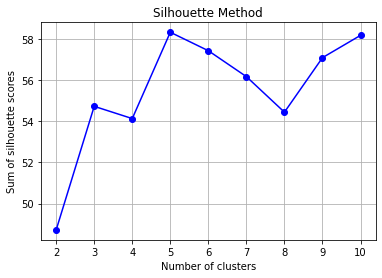

In [62]:
ran = [x for x in range(2,11)]
silhouette_scores = []
for clusters in ran:
    model = KMeans(n_clusters=clusters)
    cluster_labels = model.fit_predict(umap1)
    silhouette_avg = silhouette_score(umap1, cluster_labels)
    silhouette_scores.append(silhouette_avg * umap1.shape[0])

plt.plot(ran, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.title('Silhouette Method')
plt.grid()
plt.xticks(ran, ran)
plt.show()

In [63]:
user1_cluster_num = np.where(silhouette_scores == max(silhouette_scores))
user1_cluster_num = ran[user1_cluster_num[0][0]]

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


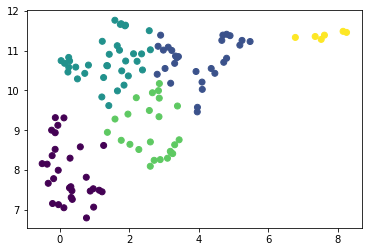

In [64]:
model = KMeans(n_clusters=user1_cluster_num)
clusters = model.fit_predict(umap1)
plt.scatter(umap1[:, 0], umap1[:, 1], c=clusters)
plt.show()

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

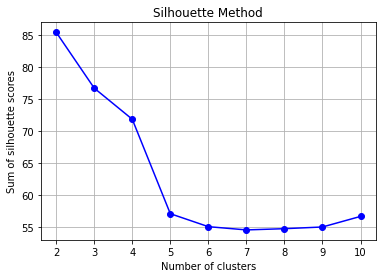

In [65]:
ran = [x for x in range(2,11)]
silhouette_scores = []
for clusters in ran:
    model = KMeans(n_clusters=clusters)
    cluster_labels = model.fit_predict(umap2)
    silhouette_avg = silhouette_score(umap2, cluster_labels)
    silhouette_scores.append(silhouette_avg * umap2.shape[0])

plt.plot(ran, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.title('Silhouette Method')
plt.grid()
plt.xticks(ran, ran)
plt.show()

In [66]:
user2_cluster_num = np.where(silhouette_scores == max(silhouette_scores))
user2_cluster_num = ran[user2_cluster_num[0][0]]

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


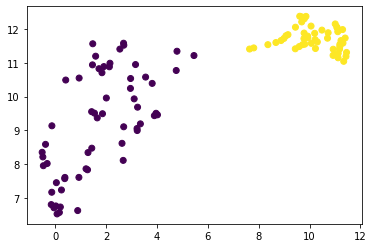

In [67]:
model = KMeans(n_clusters=user2_cluster_num)
clusters = model.fit_predict(umap2)
plt.scatter(umap2[:, 0], umap2[:, 1], c=clusters)
plt.show()

In [68]:
user1_master, user1_means = cluster_assign(umap1, user1_master, user1_cluster_num)

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
user2_master, user2_means = cluster_assign(umap2, user2_master, user2_cluster_num)

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
#Function to return distance
def calculate_distance(cluster_center, kmeans, library):
    distances = []
    for x in library:
        distance = dst.euclidean(kmeans.cluster_centers_[cluster_center], x)
        distances.append(distance)
    return distances

In [71]:
user1_recs = user2_master.copy()
user2_recs = user1_master.copy()

In [72]:
#Creating clusters of the users songs to get a summary of their taste
clusters1 = []
for i in range(len(user1_means.cluster_centers_)):
    cluster_center = i
    cluster_name = "cluster" + str(i) + "_distance"
    clusters1.append(cluster_name)
    user1_recs[cluster_name] = calculate_distance(i,user1_means, umap2)

In [73]:
#finding the smallest distance of each song to cluster centers of other users songs
user1_recs['min_value'] = user1_recs[[cluster for cluster in clusters1]].min(axis=1)

In [74]:
user1_recs = user1_recs.sort_values(by='min_value')
user1_recs['distance_rank'] = user1_recs['min_value'].rank(ascending=True, method='max').astype(int)

In [75]:
clusters2 = []
for i in range(len(user2_means.cluster_centers_)):
    cluster_center = i
    cluster_name = "cluster" + str(i) + "_distance"
    clusters2.append(cluster_name)
    user2_recs[cluster_name] = calculate_distance(i,user2_means, umap1)

In [76]:
user2_recs['min_value'] = user2_recs[[cluster for cluster in clusters2]].min(axis=1)

user2_recs = user2_recs.sort_values(by='min_value')
user2_recs['distance_rank'] = user2_recs['min_value'].rank(ascending=True, method='max').astype(int)

## <u>Genres<u>

In [77]:
#each song = seperate document
def get_genre(df):
    tfidf = TfidfVectorizer(token_pattern=r"\b[\w&+'-]+(?:-[\w&+'-]+)*\b")
    tfidf_matrix =  tfidf.fit_transform(df['genres'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = [i for i in tfidf.get_feature_names_out()]
    genre_df.reset_index(drop = True, inplace=True)
    return genre_df

In [78]:
#find the columns that are missing
def missing_columns(df1, df2):
    return list(set(df1.columns) - set(df2.columns))

In [79]:
#add the missing columns
def add_missing(df, column_list):
    df = df.reindex(columns=df.columns.tolist() + column_list)
    return df

In [80]:
user1_genres = get_genre(user2_recs)
user2_genres = get_genre(user1_recs)

user1_genres, user2_genres = user1_genres.align(user2_genres, fill_value=0.0, axis=1)

In [81]:
def get_taste(genres):
    ls = []
    for x in genres:
        for y in x:
            ls.append(y)
    res = [" ".join([str(item) for item in ls])]
    total = len(res[0].split(' '))
    word_frequencies = {}
    for word in res[0].split(' '):
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

    for x in word_frequencies:
        word_frequencies[x] = word_frequencies[x] / total
    # Create a dataframe of term frequencies
    return pd.DataFrame(list(word_frequencies.values()), index=list(word_frequencies.keys())).transpose()


In [82]:
user1_taste = get_taste(user2_recs['genres'])
user2_taste = get_taste(user1_recs['genres'])

user1_taste, user2_taste = user1_taste.align(user2_taste, fill_value=0.0, axis=1)

In [83]:
def calculate_distance_genres(taste, library):
    distances = []
    for x in library:
        distance = 1 - dst.cosine(taste, x)
        if distance == 1:
            distances.append(0)
        else:
            distances.append(distance)
    return distances

In [84]:
user1_taste_final = np.array(user1_taste)[0]
user2_taste_final = np.array(user2_taste)[0]

In [85]:
user1_genres_final = np.array(user1_genres)
user2_genres_final = np.array(user2_genres)

In [86]:
user2_recs['genre_similarity'] = calculate_distance_genres(user2_taste_final, user1_genres_final)
user1_recs['genre_similarity'] = calculate_distance_genres(user1_taste_final, user2_genres_final)

/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/willwang/opt/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [87]:
user2_recs = user2_recs.sort_values(by='genre_similarity', ascending=False)
user2_recs['genre_rank'] = user2_recs['genre_similarity'].rank(ascending=False, method='max').astype(int)
user1_recs = user1_recs.sort_values(by='genre_similarity', ascending=False)
user1_recs['genre_rank'] = user1_recs['genre_similarity'].rank(ascending=False, method='max').astype(int)


# Combining ranks

In [88]:
col_order = user1_recs.columns[:15].tolist()
col_order1 = col_order + ['cluster'] +  clusters1 + ['min_value', 'genre_similarity', 'score_rank', 'distance_rank', 'genre_rank']
col_order2 = col_order + ['cluster'] +  clusters2 + ['min_value', 'genre_similarity', 'score_rank', 'distance_rank', 'genre_rank']


In [89]:
user1_recs = user1_recs.reindex(columns=col_order1)
user2_recs = user2_recs.reindex(columns=col_order2)

In [90]:
def combine_ranks(recs):
    return 0.4 * recs['distance_rank'] + 0.2 * recs['score_rank'] + 0.4 * recs['genre_rank']

In [91]:
user2_recs['average_rank'] = combine_ranks(user2_recs)
user2_final = user2_recs.sort_values(by=['average_rank']).head(20)
user2_final

,song_id,name,artist,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,...,score,cluster,cluster0_distance,cluster1_distance,min_value,genre_similarity,score_rank,distance_rank,genre_rank,average_rank
79,0lTH3Dt0GlBQhxFHSnaZ7g,ROCKSTAR P,[Baby Keem],0.15200,0.948,0.573,0.000000,-8.162,0.1130,0.4000,...,58,3,1.262095,7.595462,1.262095,0.114802,21,19,7,14.6
77,3Xsmpypmc2DcxQBbmnnrB5,3000 Miles (Baby Baby),[Yeek],0.00675,0.643,0.638,0.000018,-7.753,0.0424,0.9590,...,60,2,1.446232,7.926793,1.446232,0.142061,17,25,5,15.4
80,6u3CPnFMKANYgfdiifFOiJ,"Gravity (feat. Tyler, The Creator)","[Brent Faiyaz, DJ Dahi, Tyler, The Creator]",0.17300,0.539,0.615,0.005600,-8.746,0.2520,0.4930,...,57,2,0.824068,9.199370,0.824068,0.075716,25,10,21,17.4
86,2gq9iG0maBxkuZI7yfGJuv,Overtime,[Bryson Tiller],0.25400,0.657,0.497,0.000000,-7.689,0.1120,0.5930,...,50,3,0.463467,9.268323,0.463467,0.058039,39,3,27,19.8
90,2xB46Bj9HZ4cr058yN4Pla,Secrets,[A Boogie Wit da Hoodie],0.11800,0.539,0.648,0.000000,-6.008,0.0619,0.4030,...,45,3,0.873436,8.560594,0.873436,0.088744,50,11,14,20.0
106,17q2kvipvoCK4lX9n21zht,SLICE INTERLUDE,[Baby Keem],0.10800,0.659,0.479,0.000000,-7.162,0.1380,0.4720,...,29,3,0.174183,8.962916,0.174183,0.114802,87,1,7,20.6
19,1qtwebmDBKPQEggSKGoSfy,Since I Have A Lover,[6LACK],0.02310,0.707,0.730,0.018000,-4.152,0.0317,0.1100,...,61,3,1.485899,8.097538,1.485899,0.088709,16,29,16,21.2
104,6cLxofxCjrFpQYtifjK5Vf,Only in the West,[Yeek],0.07230,0.954,0.537,0.056900,-6.871,0.0901,0.5250,...,31,3,1.171146,7.754543,1.171146,0.142061,82,16,5,24.8
94,7nc7mlSdWYeFom84zZ8Wr8,Tell Em,"[Cochise, $NOT]",0.10300,0.672,0.717,0.000000,-7.476,0.2260,0.4730,...,41,2,0.529290,9.050953,0.529290,0.054060,58,5,31,26.0
15,4qDpLaFGf5ampf2DXD2TMA,Where You Are,"[John Summit, Hayla]",0.00953,0.560,0.832,0.005410,-6.432,0.0363,0.0818,...,65,3,0.627871,8.752698,0.627871,0.010308,10,6,62,29.2


In [93]:
user1_recs['average_rank'] = combine_ranks(user1_recs)
user1_final =user1_recs.sort_values(by=['average_rank']).head(20)
user1_final

,song_id,name,artist,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,...,cluster1_distance,cluster2_distance,cluster3_distance,cluster4_distance,min_value,genre_similarity,score_rank,distance_rank,genre_rank,average_rank
2,1KKc8f9ZiKFzOeRJJ3SYn7,STAY TUNE,[Suchmos],0.10100,0.692,0.884,0.001060,-7.794,0.0503,0.575,...,0.469640,2.167882,1.776939,4.145686,0.469640,0.058010,2,11,21,13.2
20,7eWGnKg4B44sbBPpQp4y2c,Dragonball Durag,[Thundercat],0.69700,0.648,0.590,0.808000,-9.664,0.0942,0.401,...,3.731372,6.285541,5.490622,0.038575,0.038575,0.215427,48,1,10,14.0
19,75Yz67wlMsVyXTP3SlS2D9,McDonald Romance,[King Gnu],0.07620,0.636,0.546,0.000102,-7.688,0.0734,0.433,...,2.124660,2.109510,0.088753,5.430022,0.088753,0.048649,18,2,27,15.2
5,4Tla2jt77nO70DgGwFejbK,Run It Up,"[Snakehips, EARTHGANG]",0.00621,0.838,0.793,0.000000,-5.176,0.1450,0.527,...,0.820231,1.772616,1.985167,4.484186,0.820231,0.403390,11,29,5,15.8
13,0LQs5gRhqJKLOl8fFukRsQ,よふかしのうた,[Creepy Nuts],0.18800,0.746,0.976,0.000000,-3.123,0.1870,0.912,...,2.506356,0.185410,2.290434,6.174439,0.185410,0.048649,29,3,27,17.8
4,0xta6Gah3inmeHbj0e3F9a,Headshots (4r Da Locals),[Isaiah Rashad],0.03080,0.894,0.615,0.009210,-6.269,0.0826,0.661,...,2.132109,1.016417,1.171241,5.790294,1.016417,0.424711,9,40,3,19.0
10,4qikXelSRKvoCqFcHLB2H2,Mercy,"[Kanye West, Big Sean, Pusha T, 2 Chainz]",0.06850,0.563,0.496,0.000058,-9.381,0.4060,0.426,...,3.569484,1.023317,2.728184,7.266408,1.023317,0.433953,19,41,2,21.0
12,0BYa5V0RyOYthDeCMUBJQZ,me me she,[RADWIMPS],0.02040,0.617,0.592,0.000001,-4.816,0.0289,0.374,...,1.904667,2.502231,0.512798,4.981525,0.512798,0.025245,23,14,30,22.2
96,3cCOyfYvjzrBmvzNFjATbM,Bed,[Yeek],0.55100,0.824,0.576,0.245000,-8.035,0.0495,0.230,...,4.837697,3.360383,2.748197,8.192510,0.373735,0.098117,72,7,17,24.0
14,1uveEvgKX4irLcp1BUTIFD,色彩,[yama],0.17600,0.581,0.926,0.000000,-3.268,0.0662,0.874,...,2.055785,0.530638,2.034086,5.731211,0.530638,0.032240,32,16,29,24.4
